<a href="https://colab.research.google.com/github/jj2883/camelyon16/blob/master/Camelyon16_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
!nvidia-smi


Wed May 15 13:05:28 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    29W /  70W |   2543MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [13]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
48 packages can be upgraded. Run 'apt

In [14]:
#mount google drive
from google.colab import drive, files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!ls "/content/drive/My Drive/appdl_final/dataset/dataset"

tumor_001-020.tif   tumor_019.xml	tumor_059.xml	    tumor_091.tif
tumor_001_mask.tif  tumor_023_mask.tif	tumor_064_mask.tif  tumor_091.xml
tumor_001.xml	    tumor_023.tif	tumor_064.tif	    tumor_094_mask.tif
tumor_002_mask.tif  tumor_023.xml	tumor_064.xml	    tumor_094.tif
tumor_002.tif	    tumor_031_mask.tif	tumor_075_mask.tif  tumor_094.xml
tumor_002.xml	    tumor_031.tif	tumor_075.tif	    tumor_096_mask.tif
tumor_005_mask.tif  tumor_031.xml	tumor_075.xml	    tumor_096.tif
tumor_005.tif	    tumor_035_mask.tif	tumor_078_mask.tif  tumor_096.xml
tumor_005.xml	    tumor_035.tif	tumor_078.tif	    tumor_099.xml
tumor_012_mask.tif  tumor_035.xml	tumor_078.xml	    tumor_101_mask.tif
tumor_012.tif	    tumor_038.tif	tumor_081_mask.tif  tumor_101.tif
tumor_012.xml	    tumor_038.xml	tumor_081.tif	    tumor_101.xml
tumor_016_mask.tif  tumor_057_mask.tif	tumor_081.xml	    tumor_110_mask.tif
tumor_016.tif	    tumor_057.tif	tumor_084_mask.tif  tumor_110.tif
tumor_016.xml	    tumor_057.xml	tumor_084.

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray


# Read the slides

In [0]:
import os.path as osp
import openslide
from pathlib import Path

#BASE_TRUTH_DIR = Path('')

BASE_TRUTH_DIR = Path('/content/drive/My Drive/appdl_final/dataset/dataset')

slide_path1 = str(BASE_TRUTH_DIR / 'tumor_035.tif')
truth_path1 = str(BASE_TRUTH_DIR / 'tumor_035_mask.tif')

slide1 = openslide.open_slide(slide_path1)
truth1 = openslide.open_slide(truth_path1)


slide_path2 = str(BASE_TRUTH_DIR / 'tumor_002.tif')
truth_path2 = str(BASE_TRUTH_DIR / 'tumor_002_mask.tif')

slide2 = openslide.open_slide(slide_path2)
truth2 = openslide.open_slide(truth_path2)



slide_path3 = str(BASE_TRUTH_DIR / 'tumor_005.tif')
truth_path3 = str(BASE_TRUTH_DIR / 'tumor_005_mask.tif')

slide3 = openslide.open_slide(slide_path3)
truth3 = openslide.open_slide(truth_path3)



slide_path4 = str(BASE_TRUTH_DIR / 'tumor_012.tif')
truth_path4 = str(BASE_TRUTH_DIR / 'tumor_012_mask.tif')

slide4 = openslide.open_slide(slide_path4)
truth4 = openslide.open_slide(truth_path4)


slide_path5 = str(BASE_TRUTH_DIR / 'tumor_016.tif')
truth_path5 = str(BASE_TRUTH_DIR / 'tumor_016_mask.tif')

slide5 = openslide.open_slide(slide_path5)
truth5 = openslide.open_slide(truth_path5)


slide_path6 = str(BASE_TRUTH_DIR / 'tumor_019.tif')
truth_path6 = str(BASE_TRUTH_DIR / 'tumor_019_mask.tif')

slide6 = openslide.open_slide(slide_path6)
truth6 = openslide.open_slide(truth_path6)


slide_path7 = str(BASE_TRUTH_DIR / 'tumor_023.tif')
truth_path7 = str(BASE_TRUTH_DIR / 'tumor_023_mask.tif')

slide7 = openslide.open_slide(slide_path7)
truth7 = openslide.open_slide(truth_path7)


slide_path8 = str(BASE_TRUTH_DIR / 'tumor_031.tif')
truth_path8 = str(BASE_TRUTH_DIR / 'tumor_031_mask.tif')

slide8 = openslide.open_slide(slide_path8)
truth8 = openslide.open_slide(truth_path8)



slide_path9 = str(BASE_TRUTH_DIR / 'tumor_035.tif')
truth_path9 = str(BASE_TRUTH_DIR / 'tumor_035_mask.tif')

slide9 = openslide.open_slide(slide_path9)
truth9 = openslide.open_slide(truth_path9)



slide_path10 = str(BASE_TRUTH_DIR / 'tumor_057.tif')
truth_path10 = str(BASE_TRUTH_DIR / 'tumor_057_mask.tif')

slide10 = openslide.open_slide(slide_path10)
truth10 = openslide.open_slide(truth_path10)



slide_path11 = str(BASE_TRUTH_DIR / 'tumor_059.tif')
truth_path11 = str(BASE_TRUTH_DIR / 'tumor_059_mask.tif')

slide11 = openslide.open_slide(slide_path11)
truth11 = openslide.open_slide(truth_path11)



slide_path12 = str(BASE_TRUTH_DIR / 'tumor_064.tif')
truth_path12 = str(BASE_TRUTH_DIR / 'tumor_064_mask.tif')

slide12 = openslide.open_slide(slide_path12)
truth12 = openslide.open_slide(truth_path12)



slide_path13 = str(BASE_TRUTH_DIR / 'tumor_075.tif')
truth_path13 = str(BASE_TRUTH_DIR / 'tumor_075_mask.tif')

slide13 = openslide.open_slide(slide_path13)
truth13 = openslide.open_slide(truth_path13)



slide_path14 = str(BASE_TRUTH_DIR / 'tumor_078.tif')
truth_path14 = str(BASE_TRUTH_DIR / 'tumor_078_mask.tif')

slide14 = openslide.open_slide(slide_path14)
truth14 = openslide.open_slide(truth_path14)



slide_path15 = str(BASE_TRUTH_DIR / 'tumor_081.tif')
truth_path15 = str(BASE_TRUTH_DIR / 'tumor_081_mask.tif')

slide15 = openslide.open_slide(slide_path15)
truth15 = openslide.open_slide(truth_path15)



slide_path16 = str(BASE_TRUTH_DIR / 'tumor_084.tif')
truth_path16 = str(BASE_TRUTH_DIR / 'tumor_084_mask.tif')

slide16 = openslide.open_slide(slide_path16)
truth16 = openslide.open_slide(truth_path16)



slide_path17 = str(BASE_TRUTH_DIR / 'tumor_091.tif')
truth_path17 = str(BASE_TRUTH_DIR / 'tumor_091_mask.tif')

slide17 = openslide.open_slide(slide_path17)
truth17 = openslide.open_slide(truth_path17)



slide_path18 = str(BASE_TRUTH_DIR / 'tumor_094.tif')
truth_path18 = str(BASE_TRUTH_DIR / 'tumor_094_mask.tif')

slide18 = openslide.open_slide(slide_path18)
truth18 = openslide.open_slide(truth_path18)



slide_path19 = str(BASE_TRUTH_DIR / 'tumor_096.tif')
truth_path19 = str(BASE_TRUTH_DIR / 'tumor_096_mask.tif')

slide19 = openslide.open_slide(slide_path19)
truth19 = openslide.open_slide(truth_path19)



slide_path20 = str(BASE_TRUTH_DIR / 'tumor_101.tif')
truth_path20 = str(BASE_TRUTH_DIR / 'tumor_101_mask.tif')

slide20 = openslide.open_slide(slide_path20)
truth20 = openslide.open_slide(truth_path20)



slide_path21 = str(BASE_TRUTH_DIR / 'tumor_110.tif')
truth_path21 = str(BASE_TRUTH_DIR / 'tumor_110_mask.tif')

slide21 = openslide.open_slide(slide_path21)
truth21 = openslide.open_slide(truth_path21)




# Plot Slides their Mask

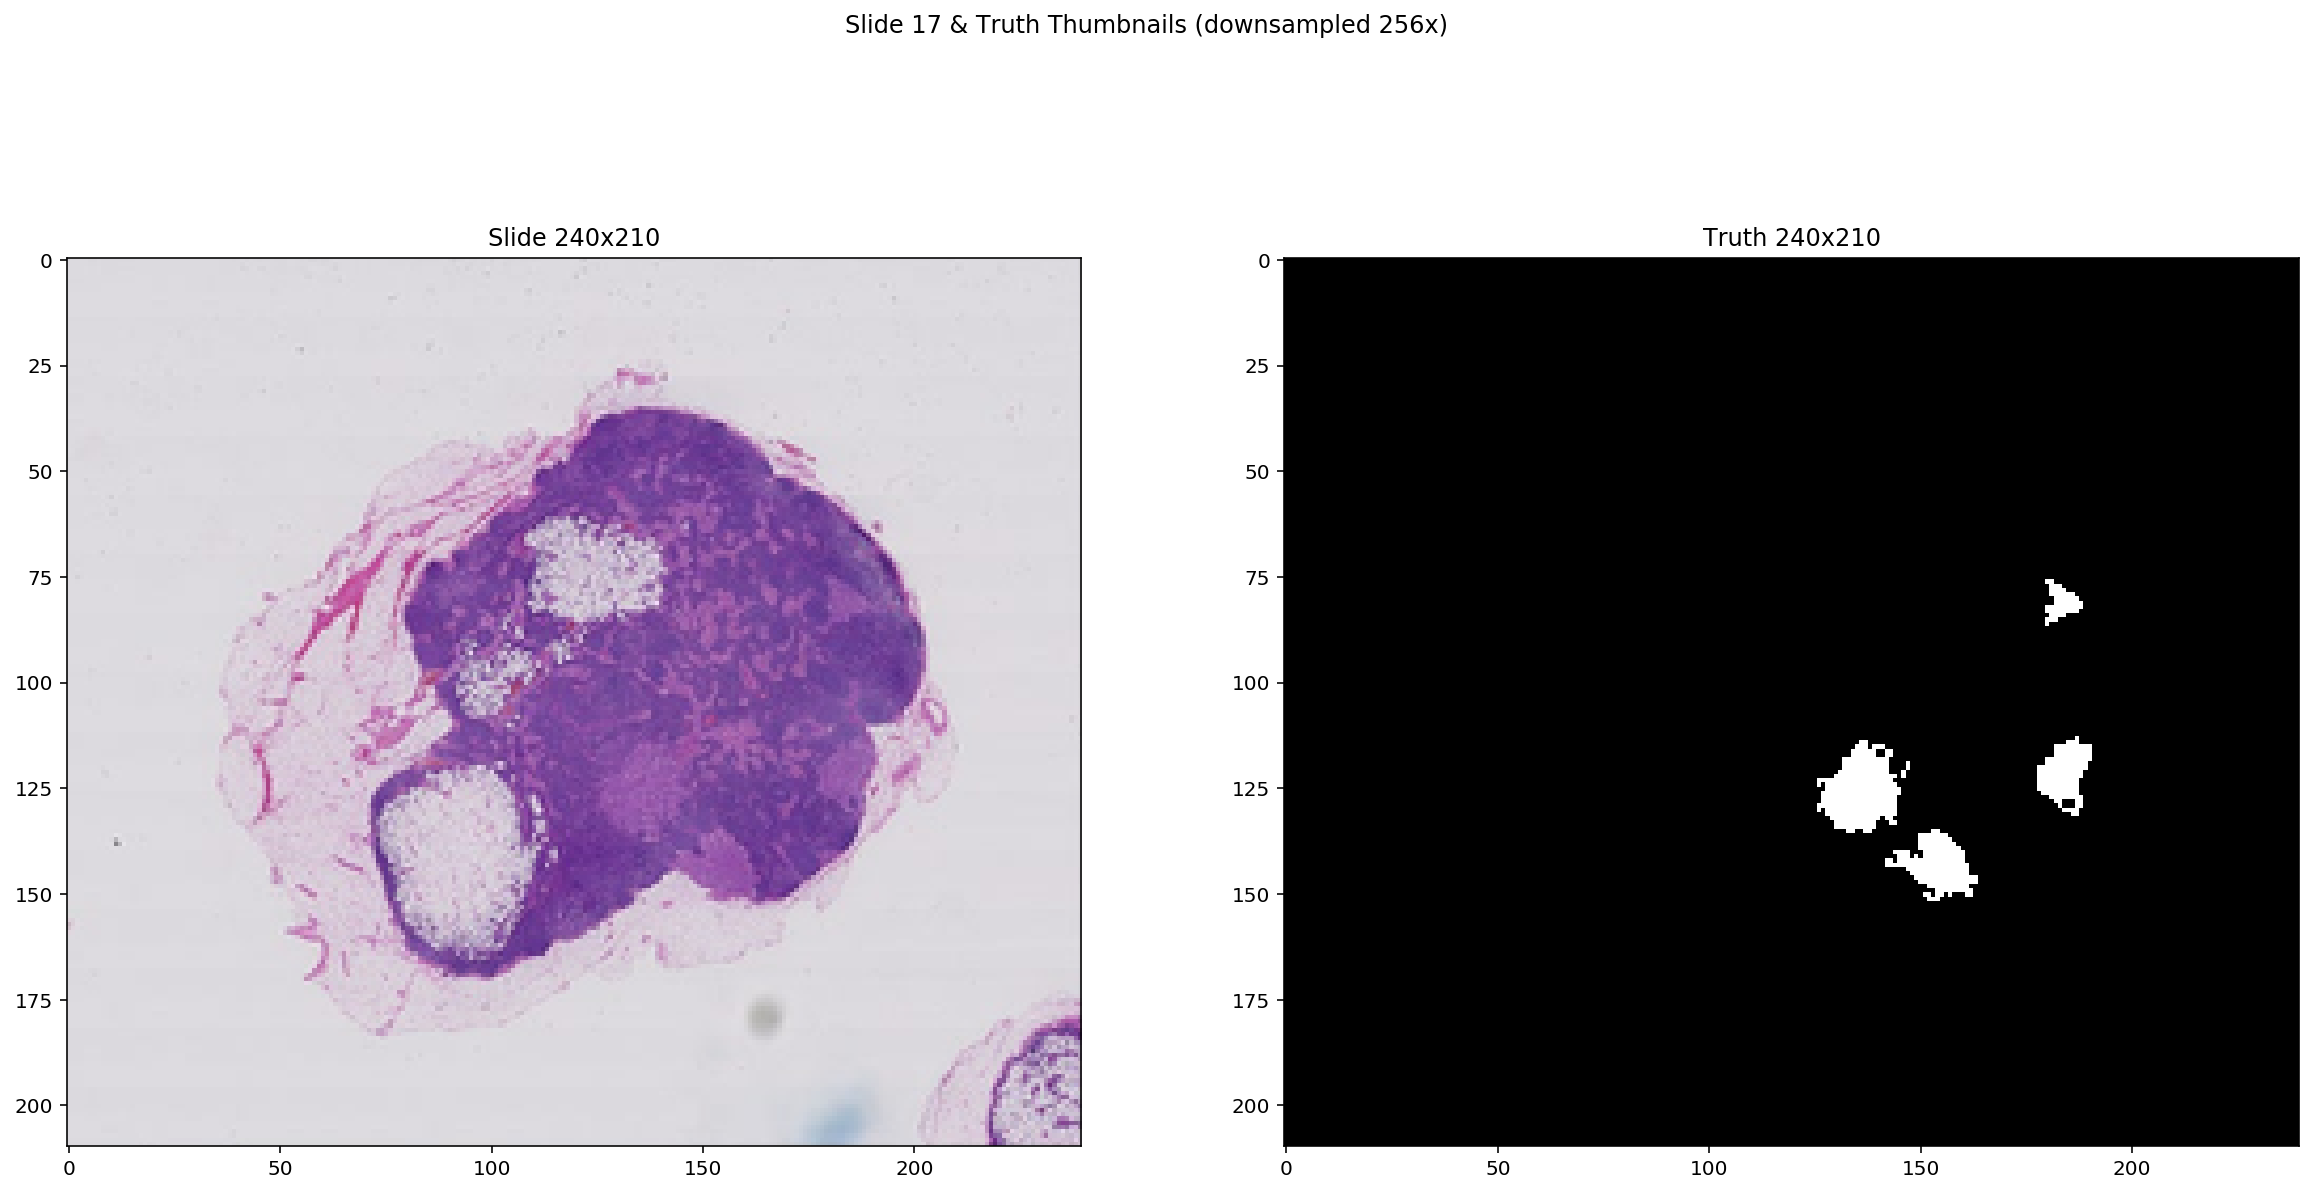

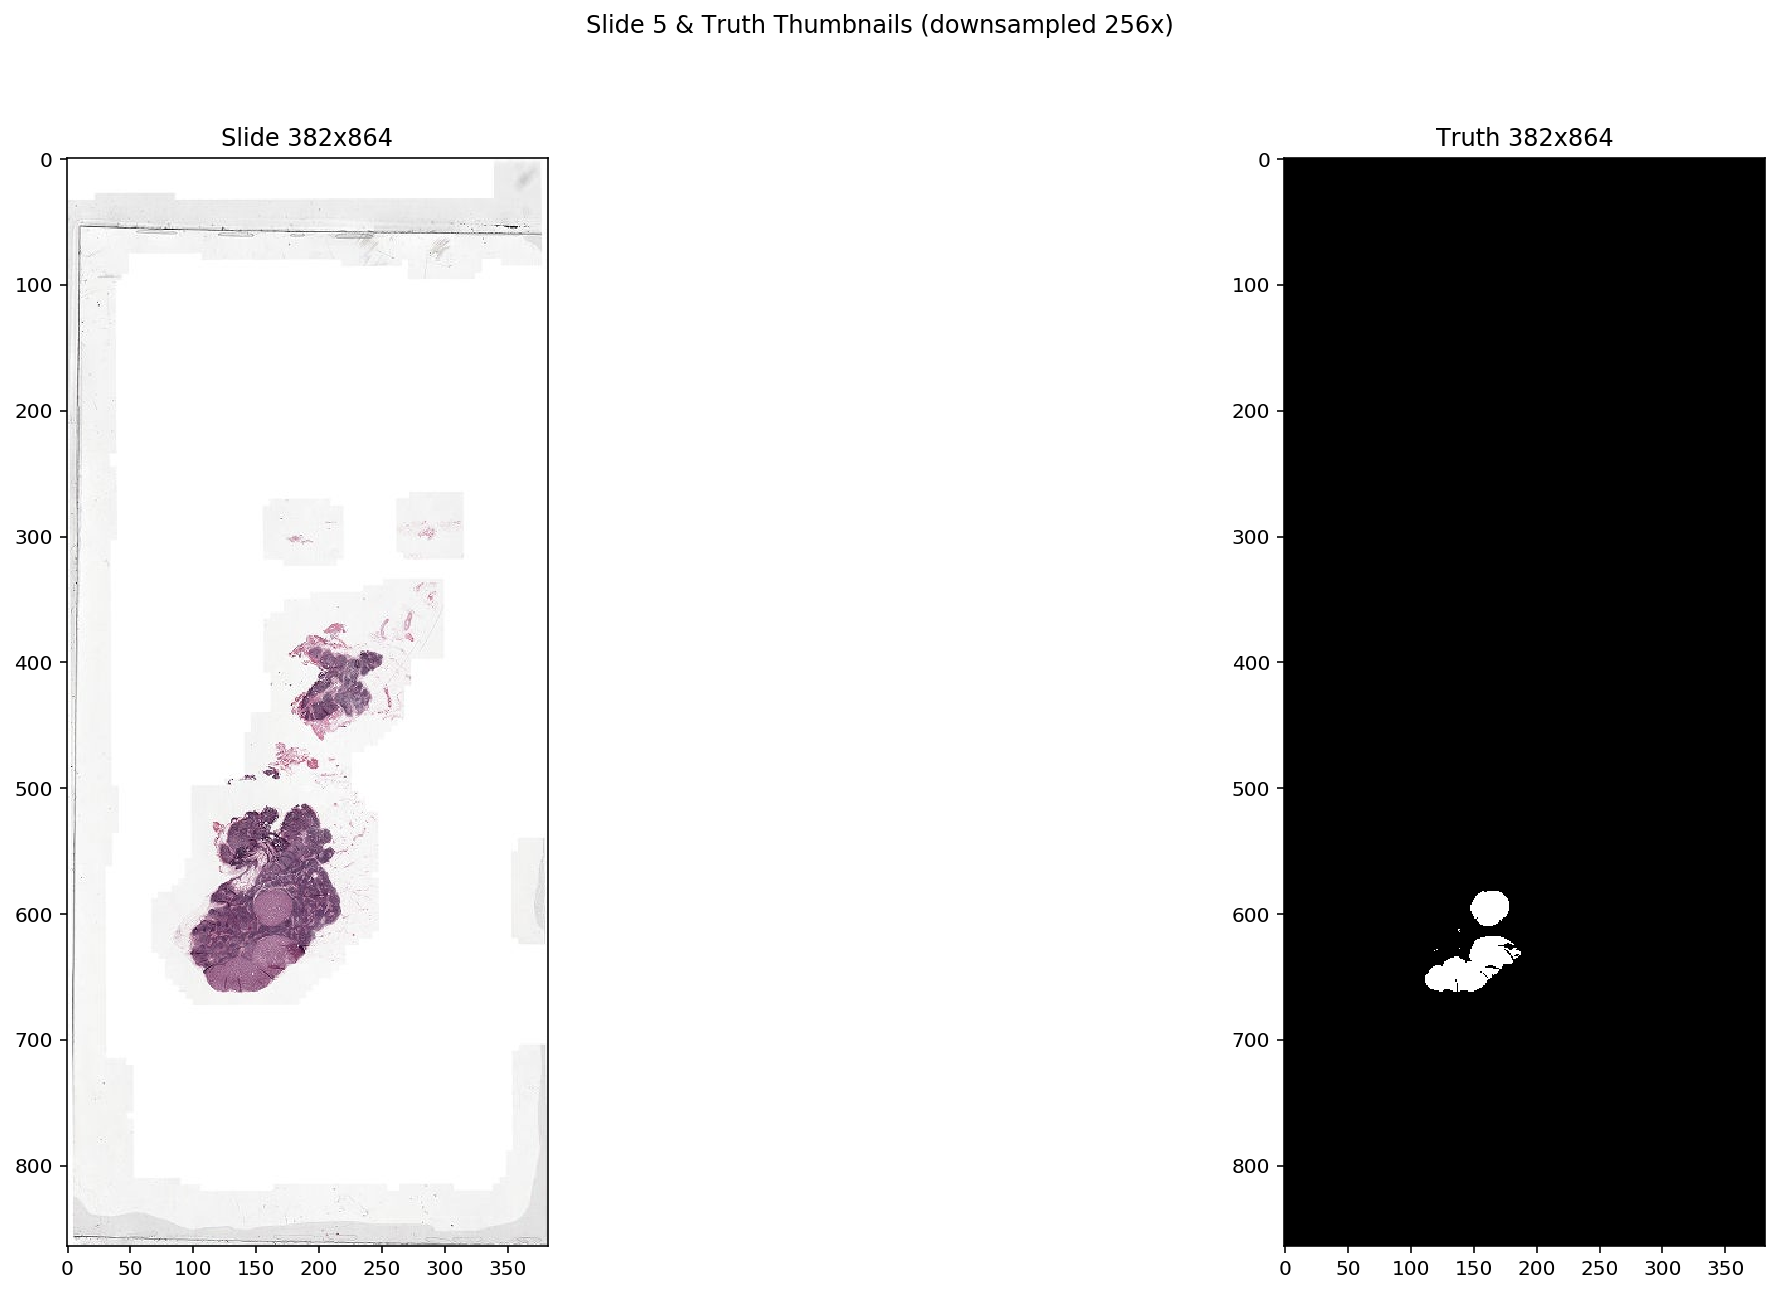

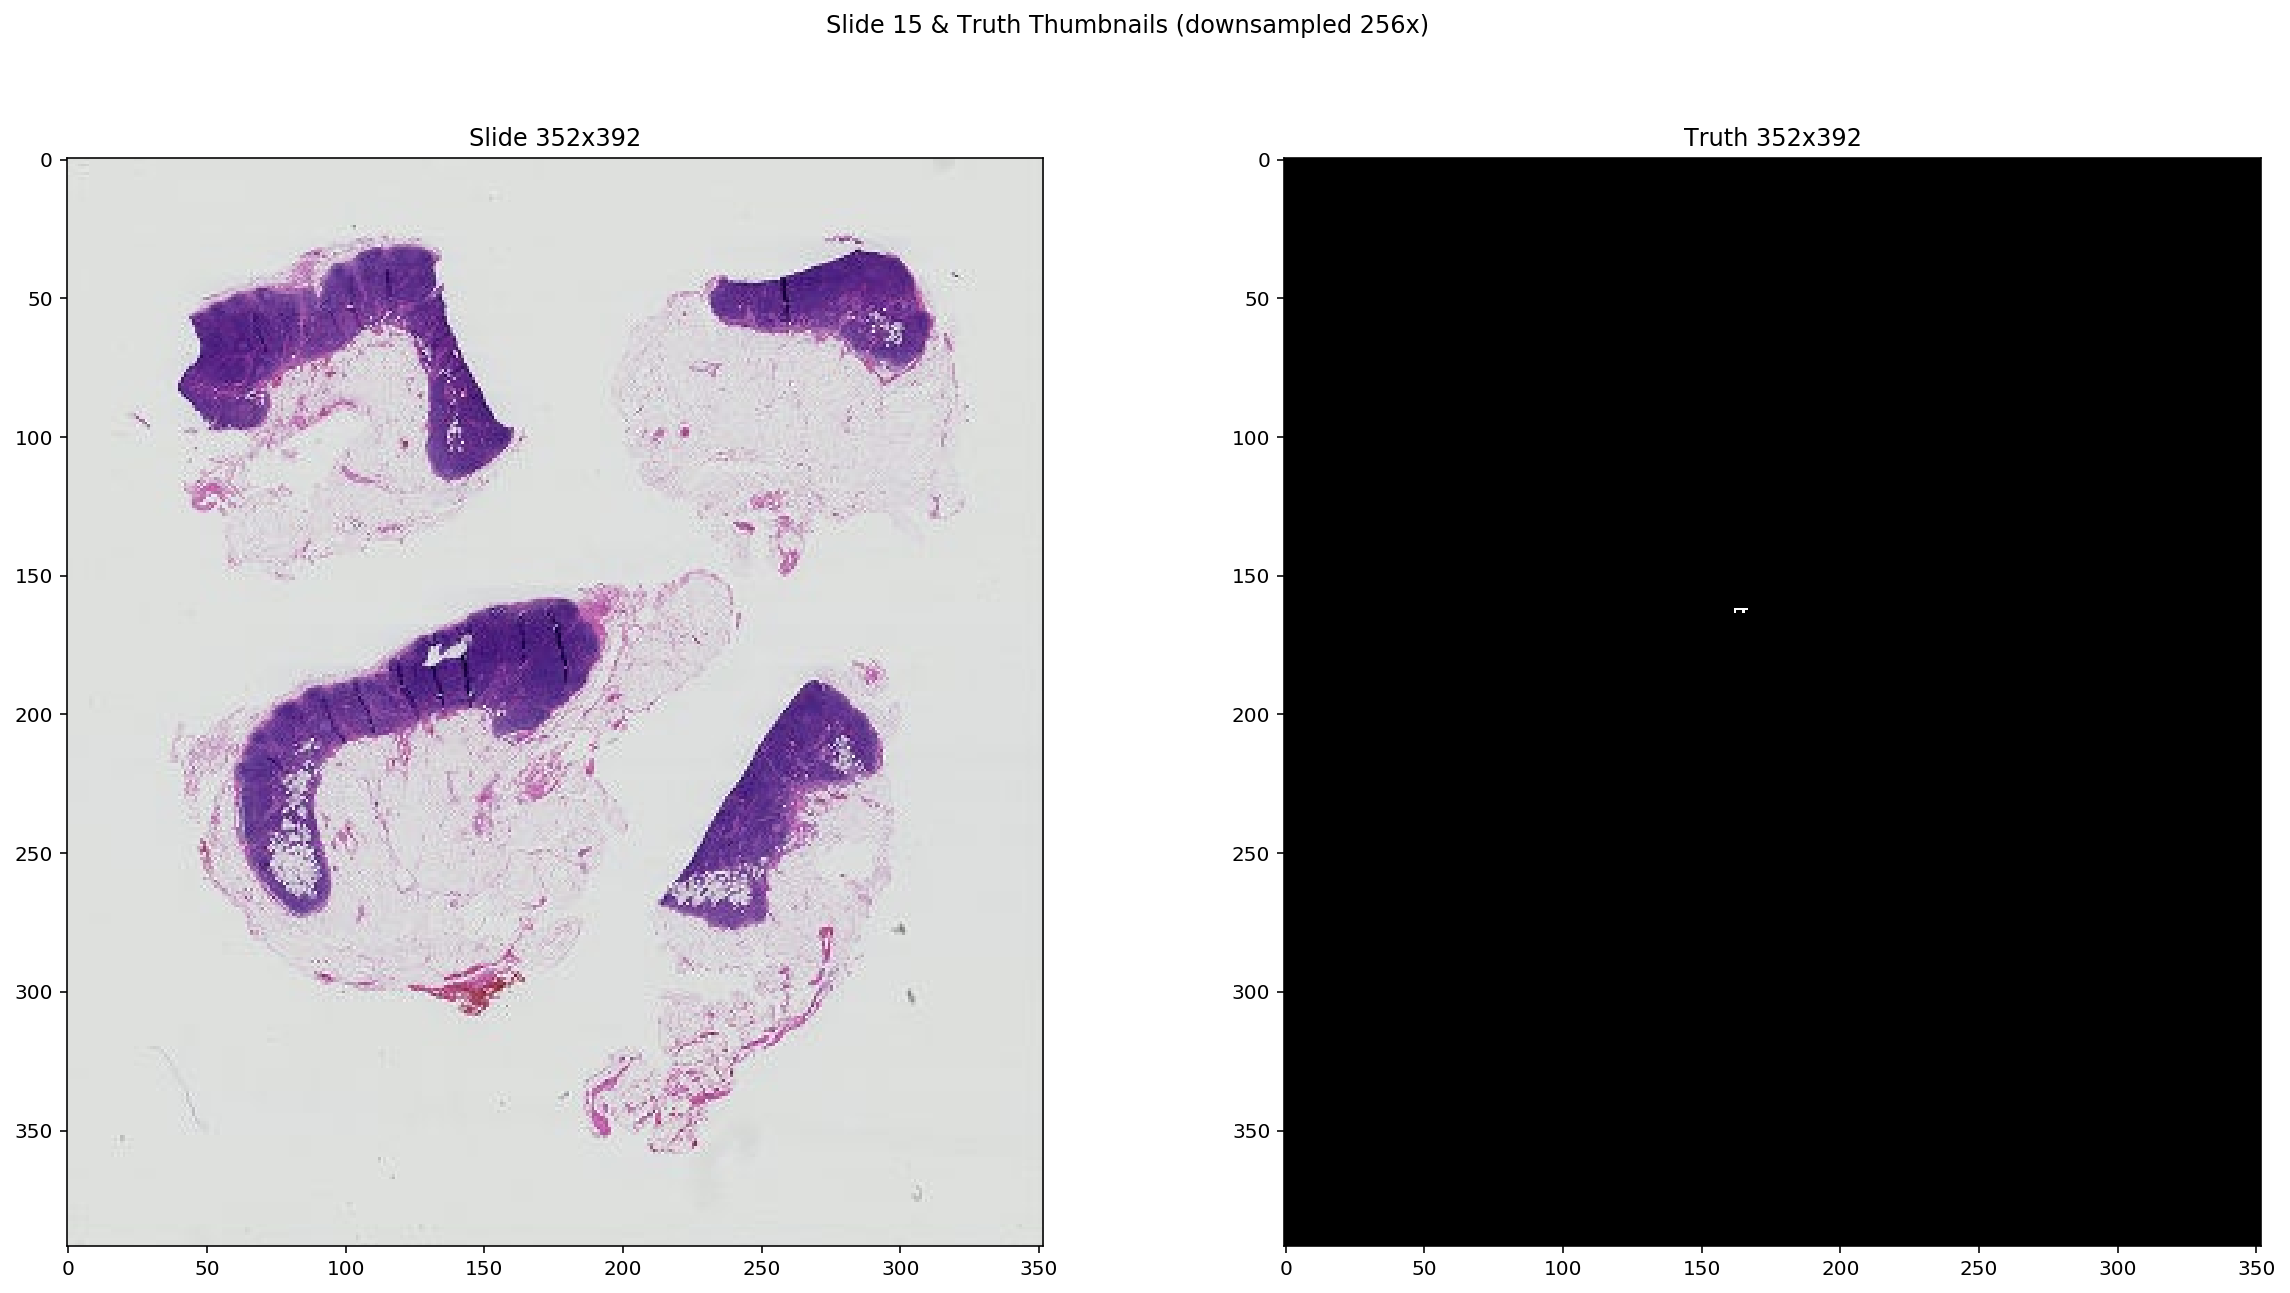

In [18]:
thumbnail = slide17.get_thumbnail((slide17.dimensions[0] / 256, slide17.dimensions[1] / 256))
thumbnail_truth = truth17.get_thumbnail((truth17.dimensions[0] / 256, truth17.dimensions[1] / 256)) 

f, axes = plt.subplots(1, 2, figsize=(20, 10));
ax = axes.ravel()
ax[0].imshow(thumbnail);
ax[0].set_title('Slide %dx%d' % thumbnail.size)
ax[1].imshow(thumbnail_truth.convert('L'), cmap='gray');
ax[1].set_title('Truth %dx%d' % thumbnail_truth.size)
f.suptitle('Slide 17 & Truth Thumbnails (downsampled 256x)');

thumbnail = slide5.get_thumbnail((slide5.dimensions[0] / 256, slide5.dimensions[1] / 256))
thumbnail_truth = truth5.get_thumbnail((truth5.dimensions[0] / 256, truth5.dimensions[1] / 256)) 

f, axes = plt.subplots(1, 2, figsize=(20, 10));
ax = axes.ravel()
ax[0].imshow(thumbnail);
ax[0].set_title('Slide %dx%d' % thumbnail.size)
ax[1].imshow(thumbnail_truth.convert('L'), cmap='gray');
ax[1].set_title('Truth %dx%d' % thumbnail_truth.size)
f.suptitle('Slide 5 & Truth Thumbnails (downsampled 256x)');


thumbnail = slide15.get_thumbnail((slide15.dimensions[0] / 256, slide15.dimensions[1] / 256))
thumbnail_truth = truth15.get_thumbnail((truth15.dimensions[0] / 256, truth15.dimensions[1] / 256)) 

f, axes = plt.subplots(1, 2, figsize=(20, 10));
ax = axes.ravel()
ax[0].imshow(thumbnail);
ax[0].set_title('Slide %dx%d' % thumbnail.size)
ax[1].imshow(thumbnail_truth.convert('L'), cmap='gray');
ax[1].set_title('Truth %dx%d' % thumbnail_truth.size)
f.suptitle('Slide 15 & Truth Thumbnails (downsampled 256x)');



# Transform Slides and Masks into Tiles of 256 X 256 pixels

In [0]:
from skimage.filters import threshold_otsu

from openslide.deepzoom import DeepZoomGenerator 

tiles1 = DeepZoomGenerator(slide1, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth1 = DeepZoomGenerator(truth1, tile_size=256, overlap=0, limit_bounds=False)

tiles2 = DeepZoomGenerator(slide2, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth2 = DeepZoomGenerator(truth2, tile_size=256, overlap=0, limit_bounds=False)

tiles3 = DeepZoomGenerator(slide3, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth3 = DeepZoomGenerator(truth3, tile_size=256, overlap=0, limit_bounds=False)

tiles4 = DeepZoomGenerator(slide4, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth4 = DeepZoomGenerator(truth4, tile_size=256, overlap=0, limit_bounds=False)

tiles5 = DeepZoomGenerator(slide5, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth5 = DeepZoomGenerator(truth5, tile_size=256, overlap=0, limit_bounds=False)

tiles6 = DeepZoomGenerator(slide6, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth6 = DeepZoomGenerator(truth6, tile_size=256, overlap=0, limit_bounds=False)

tiles7 = DeepZoomGenerator(slide7, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth7 = DeepZoomGenerator(truth7, tile_size=256, overlap=0, limit_bounds=False)

tiles8 = DeepZoomGenerator(slide8, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth8 = DeepZoomGenerator(truth8, tile_size=256, overlap=0, limit_bounds=False)

tiles9 = DeepZoomGenerator(slide9, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth9 = DeepZoomGenerator(truth9, tile_size=256, overlap=0, limit_bounds=False)

tiles10 = DeepZoomGenerator(slide10, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth10 = DeepZoomGenerator(truth10, tile_size=256, overlap=0, limit_bounds=False)

tiles11 = DeepZoomGenerator(slide11, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth11 = DeepZoomGenerator(truth11, tile_size=256, overlap=0, limit_bounds=False)

tiles12 = DeepZoomGenerator(slide12, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth12 = DeepZoomGenerator(truth12, tile_size=256, overlap=0, limit_bounds=False)

tiles13 = DeepZoomGenerator(slide13, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth13 = DeepZoomGenerator(truth13, tile_size=256, overlap=0, limit_bounds=False)

tiles14 = DeepZoomGenerator(slide14, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth14 = DeepZoomGenerator(truth14, tile_size=256, overlap=0, limit_bounds=False)

tiles15 = DeepZoomGenerator(slide15, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth15 = DeepZoomGenerator(truth15, tile_size=256, overlap=0, limit_bounds=False)

tiles16 = DeepZoomGenerator(slide16, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth16 = DeepZoomGenerator(truth16, tile_size=256, overlap=0, limit_bounds=False)

tiles17 = DeepZoomGenerator(slide17, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth17 = DeepZoomGenerator(truth17, tile_size=256, overlap=0, limit_bounds=False)

tiles18 = DeepZoomGenerator(slide18, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth18 = DeepZoomGenerator(truth18, tile_size=256, overlap=0, limit_bounds=False)

tiles19 = DeepZoomGenerator(slide19, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth19 = DeepZoomGenerator(truth19, tile_size=256, overlap=0, limit_bounds=False)

tiles20 = DeepZoomGenerator(slide20, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth20 = DeepZoomGenerator(truth20, tile_size=256, overlap=0, limit_bounds=False)

tiles21 = DeepZoomGenerator(slide21, tile_size=256, overlap=0, limit_bounds=False)
tiles_truth21 = DeepZoomGenerator(truth21, tile_size=256, overlap=0, limit_bounds=False)


# print(tiles.level_count)
# print(tiles_truth.level_count)

# print(tiles.level_dimensions[16])
# print(tiles_truth.level_dimensions[15])
# print(tiles.level_tiles[15])
# print(tiles_truth.level_tiles[15])



# Find Only the Tissue Patches comparing Slides with Bianry

In [0]:
def find_patches_from_slide(slide_path, base_truth_dir=BASE_TRUTH_DIR, filter_non_tissue=True):
    """Returns a dataframe of all patches in slide
    input: slide_path: path to WSI file
    output: samples: dataframe with the following columns:
        slide_path: path of slide
        is_tissue: sample contains tissue
        is_tumor: truth status of sample
        tile_loc: coordinates of samples in slide
        
    
    option: base_truth_dir: directory of truth slides
    option: filter_non_tissue: Remove samples no tissue detected
    """
    base_truth_dir = Path(base_truth_dir)
    #slide_contains_tumor = slide_path.startswith('tumor_')
    slide_contains_tumor = osp.basename(slide_path).startswith('tumor_')
    
    
    with openslide.open_slide(slide_path) as slide:
        thumbnail = slide.get_thumbnail((slide.dimensions[0] / 256, slide.dimensions[1] / 256))
    
    thumbnail_grey = np.array(thumbnail.convert('L')) # convert to grayscale
    thresh = threshold_otsu(thumbnail_grey)
    binary = thumbnail_grey > thresh
    
    patches = pd.DataFrame(pd.DataFrame(binary).stack())
    patches['is_tissue'] = ~patches[0]
    patches.drop(0, axis=1, inplace=True)
    patches['slide_path'] = slide_path
    
    if slide_contains_tumor:
 #       truth_slide_path = osp.basename(slide_path).replace('.tif', '_mask.tif')
        truth_slide_path = base_truth_dir / osp.basename(slide_path).replace('.tif', '_mask.tif')
        with openslide.open_slide(str(truth_slide_path)) as truth:
            thumbnail_truth = truth.get_thumbnail((truth.dimensions[0] / 256, truth.dimensions[1] / 256)) 
        
        patches_y = pd.DataFrame(pd.DataFrame(np.array(thumbnail_truth.convert("L"))).stack())
        patches_y['is_tumor'] = patches_y[0] > 0
        patches_y.drop(0, axis=1, inplace=True)

        samples = pd.concat([patches, patches_y], axis=1)
    else:
        samples = patches
        samples['is_tumor'] = False
    
    if filter_non_tissue:
        samples = samples[samples.is_tissue == True] # remove patches with no tissue
    samples['tile_loc'] = list(samples.index)
    samples.reset_index(inplace=True, drop=True)
    return samples

In [22]:
all_tissue_samples1 = find_patches_from_slide(slide_path1)
all_tissue_samples2 = find_patches_from_slide(slide_path2)
all_tissue_samples3 = find_patches_from_slide(slide_path3)
all_tissue_samples4 = find_patches_from_slide(slide_path4)
all_tissue_samples5 = find_patches_from_slide(slide_path5)
all_tissue_samples6 = find_patches_from_slide(slide_path6)
all_tissue_samples7 = find_patches_from_slide(slide_path7)
all_tissue_samples8 = find_patches_from_slide(slide_path8)
all_tissue_samples9 = find_patches_from_slide(slide_path9)
all_tissue_samples10 = find_patches_from_slide(slide_path10)
all_tissue_samples11 = find_patches_from_slide(slide_path11)
all_tissue_samples12 = find_patches_from_slide(slide_path12)
all_tissue_samples13 = find_patches_from_slide(slide_path13)
all_tissue_samples14 = find_patches_from_slide(slide_path14)
all_tissue_samples15 = find_patches_from_slide(slide_path15)
all_tissue_samples16 = find_patches_from_slide(slide_path16)
all_tissue_samples17 = find_patches_from_slide(slide_path17)
all_tissue_samples18 = find_patches_from_slide(slide_path18)
all_tissue_samples19 = find_patches_from_slide(slide_path19)
all_tissue_samples20 = find_patches_from_slide(slide_path20)
all_tissue_samples21 = find_patches_from_slide(slide_path21)

print('Total patches in slide1: %d' % len(all_tissue_samples1))
print('Total patches in slide2: %d' % len(all_tissue_samples2))
print('Total patches in slide3: %d' % len(all_tissue_samples3))

all_tissue_samples1.iloc[:10]
all_tissue_samples2.is_tumor.value_counts()

Total patches in slide1: 13430
Total patches in slide2: 14049
Total patches in slide3: 13166


is_tissue  ...   tile_loc
0       True  ...   (8, 365)
1       True  ...   (9, 364)
2       True  ...  (19, 372)
3       True  ...  (29, 328)
4       True  ...  (30, 241)
5       True  ...  (31, 241)
6       True  ...  (37, 134)
7       True  ...  (40, 193)
8       True  ...  (41, 260)
9       True  ...  (42, 329)

[10 rows x 4 columns]

False    14037
True        12
Name: is_tumor, dtype: int64

# Extract the Tissue Patches with Tumor and Non-Tumor

In [0]:
tumor_samples1 = all_tissue_samples1[all_tissue_samples1.is_tumor]
tumor_samples2 = all_tissue_samples2[all_tissue_samples2.is_tumor]
tumor_samples3 = all_tissue_samples3[all_tissue_samples3.is_tumor]
tumor_samples4 = all_tissue_samples4[all_tissue_samples4.is_tumor]
tumor_samples5 = all_tissue_samples5[all_tissue_samples5.is_tumor]
tumor_samples6 = all_tissue_samples6[all_tissue_samples6.is_tumor]
tumor_samples7 = all_tissue_samples7[all_tissue_samples7.is_tumor]
tumor_samples8 = all_tissue_samples8[all_tissue_samples8.is_tumor]
tumor_samples9 = all_tissue_samples9[all_tissue_samples9.is_tumor]
tumor_samples10 = all_tissue_samples10[all_tissue_samples10.is_tumor]
tumor_samples11 = all_tissue_samples11[all_tissue_samples11.is_tumor]
tumor_samples12 = all_tissue_samples12[all_tissue_samples12.is_tumor]
tumor_samples13 = all_tissue_samples13[all_tissue_samples13.is_tumor]
tumor_samples14 = all_tissue_samples14[all_tissue_samples14.is_tumor]
tumor_samples15 = all_tissue_samples15[all_tissue_samples15.is_tumor]
tumor_samples16 = all_tissue_samples16[all_tissue_samples16.is_tumor]
tumor_samples17 = all_tissue_samples17[all_tissue_samples17.is_tumor]
tumor_samples18 = all_tissue_samples18[all_tissue_samples18.is_tumor]
tumor_samples19 = all_tissue_samples19[all_tissue_samples19.is_tumor]
tumor_samples20 = all_tissue_samples20[all_tissue_samples20.is_tumor]
tumor_samples21 = all_tissue_samples21[all_tissue_samples21.is_tumor]



non_tumor_samples1 = all_tissue_samples1[all_tissue_samples1['is_tumor']==False]
non_tumor_samples2 = all_tissue_samples2[all_tissue_samples2['is_tumor']==False]
non_tumor_samples3 = all_tissue_samples3[all_tissue_samples3['is_tumor']==False]
non_tumor_samples4 = all_tissue_samples4[all_tissue_samples4['is_tumor']==False]
non_tumor_samples5 = all_tissue_samples5[all_tissue_samples5['is_tumor']==False]
non_tumor_samples6 = all_tissue_samples6[all_tissue_samples6['is_tumor']==False]
non_tumor_samples7 = all_tissue_samples7[all_tissue_samples7['is_tumor']==False]
non_tumor_samples8 = all_tissue_samples8[all_tissue_samples8['is_tumor']==False]
non_tumor_samples9 = all_tissue_samples9[all_tissue_samples9['is_tumor']==False]
non_tumor_samples10 = all_tissue_samples10[all_tissue_samples10['is_tumor']==False]
non_tumor_samples11 = all_tissue_samples11[all_tissue_samples11['is_tumor']==False]
non_tumor_samples12 = all_tissue_samples12[all_tissue_samples12['is_tumor']==False]
non_tumor_samples13 = all_tissue_samples13[all_tissue_samples13['is_tumor']==False]
non_tumor_samples14 = all_tissue_samples14[all_tissue_samples14['is_tumor']==False]
non_tumor_samples15 = all_tissue_samples15[all_tissue_samples15['is_tumor']==False]
non_tumor_samples16 = all_tissue_samples16[all_tissue_samples16['is_tumor']==False]
non_tumor_samples17 = all_tissue_samples17[all_tissue_samples17['is_tumor']==False]
non_tumor_samples18 = all_tissue_samples18[all_tissue_samples18['is_tumor']==False]
non_tumor_samples19 = all_tissue_samples19[all_tissue_samples19['is_tumor']==False]
non_tumor_samples20 = all_tissue_samples20[all_tissue_samples20['is_tumor']==False]
non_tumor_samples21 = all_tissue_samples21[all_tissue_samples21['is_tumor']==False]

In [24]:
tumor_samples = tumor_samples1
tumor_samples.append(tumor_samples2, ignore_index = True)
tumor_samples.append(tumor_samples3, ignore_index = True)
tumor_samples.append(tumor_samples4, ignore_index = True)
tumor_samples.append(tumor_samples5, ignore_index = True)
tumor_samples.append(tumor_samples6, ignore_index = True)
tumor_samples.append(tumor_samples7, ignore_index = True)
tumor_samples.append(tumor_samples8, ignore_index = True)
tumor_samples.append(tumor_samples9, ignore_index = True)
tumor_samples.append(tumor_samples10, ignore_index = True)
tumor_samples.append(tumor_samples11, ignore_index = True)
tumor_samples.append(tumor_samples12, ignore_index = True)
tumor_samples.append(tumor_samples13, ignore_index = True)
tumor_samples.append(tumor_samples14, ignore_index = True)
tumor_samples.append(tumor_samples15, ignore_index = True)
tumor_samples.append(tumor_samples16, ignore_index = True)
tumor_samples.append(tumor_samples17, ignore_index = True)
tumor_samples.append(tumor_samples18, ignore_index = True)
tumor_samples.append(tumor_samples19, ignore_index = True)
tumor_samples.append(tumor_samples20, ignore_index = True)
tumor_samples=tumor_samples.append(tumor_samples21, ignore_index = True)

non_tumor_samples = non_tumor_samples1
non_tumor_samples.append(non_tumor_samples2, ignore_index = True)
non_tumor_samples.append(non_tumor_samples3, ignore_index = True)
non_tumor_samples.append(non_tumor_samples4, ignore_index = True)
non_tumor_samples.append(non_tumor_samples5, ignore_index = True)
non_tumor_samples.append(non_tumor_samples6, ignore_index = True)
non_tumor_samples.append(non_tumor_samples7, ignore_index = True)
non_tumor_samples.append(non_tumor_samples8, ignore_index = True)
non_tumor_samples.append(non_tumor_samples9, ignore_index = True)
non_tumor_samples.append(non_tumor_samples10, ignore_index = True)
non_tumor_samples.append(non_tumor_samples11, ignore_index = True)
non_tumor_samples.append(non_tumor_samples12, ignore_index = True)
non_tumor_samples.append(non_tumor_samples13, ignore_index = True)
non_tumor_samples.append(non_tumor_samples14, ignore_index = True)
non_tumor_samples.append(non_tumor_samples15, ignore_index = True)
non_tumor_samples.append(non_tumor_samples16, ignore_index = True)
non_tumor_samples.append(non_tumor_samples17, ignore_index = True)
non_tumor_samples.append(non_tumor_samples18, ignore_index = True)
non_tumor_samples.append(non_tumor_samples19, ignore_index = True)
non_tumor_samples.append(non_tumor_samples20, ignore_index = True)
non_tumor_samples=non_tumor_samples.append(non_tumor_samples21, ignore_index = True)



is_tissue  ...    tile_loc
0        True  ...  (341, 153)
1        True  ...  (389, 166)
2        True  ...  (390, 166)
3        True  ...  (401, 182)
4        True  ...  (401, 183)
5        True  ...  (402, 183)
6        True  ...  (402, 184)
7        True  ...  (403, 184)
8        True  ...  (404, 183)
9        True  ...  (404, 184)
10       True  ...  (405, 184)
11       True  ...  (405, 185)
12       True  ...  (406, 185)
13       True  ...  (407, 185)
14       True  ...  (408, 185)

[15 rows x 4 columns]

is_tissue  ...    tile_loc
0        True  ...  (341, 153)
1        True  ...  (389, 166)
2        True  ...  (390, 166)
3        True  ...  (534, 228)
4        True  ...  (535, 229)
5        True  ...  (536, 228)
6        True  ...  (537, 226)
7        True  ...  (537, 227)
8        True  ...  (537, 228)
9        True  ...  (537, 229)
10       True  ...  (538, 226)
11       True  ...  (538, 227)
12       True  ...  (538, 228)
13       True  ...  (538, 229)
14       True  ...  (539, 226)
15       True  ...  (539, 227)
16       True  ...  (539, 228)
17       True  ...  (539, 229)
18       True  ...  (539, 231)
19       True  ...  (539, 232)
20       True  ...  (540, 226)
21       True  ...  (540, 227)
22       True  ...  (540, 228)
23       True  ...  (540, 229)
24       True  ...  (540, 230)
25       True  ...  (540, 231)
26       True  ...  (541, 228)
27       True  ...  (541, 229)
28       True  ...  (542, 229)
29       True  ...  (542, 230)
30       True  ...  (542, 232)
31       True  ...  (543, 230)
32       True  ...  (544, 229)
33       True  ...  (544, 230)
34       True  ...  (545, 228)
35       True  ...  (545, 229)
36       True  ...  (545, 230)
37       True  ...  (546, 229)
38       True  ...  (546, 230)
39       True  ...  (546, 231)

[40 rows x 4 columns]

is_tissue  ...    tile_loc
0        True  ...  (341, 153)
1        True  ...  (389, 166)
2        True  ...  (390, 166)
3        True  ...  (299, 187)
4        True  ...  (299, 188)
5        True  ...  (299, 189)
6        True  ...  (299, 190)
7        True  ...  (299, 191)
8        True  ...  (300, 185)
9        True  ...  (300, 186)
10       True  ...  (300, 187)
11       True  ...  (300, 188)
12       True  ...  (300, 189)
13       True  ...  (300, 190)
14       True  ...  (300, 191)
15       True  ...  (300, 192)
16       True  ...  (301, 188)
17       True  ...  (301, 189)
18       True  ...  (301, 190)
19       True  ...  (301, 191)
20       True  ...  (301, 192)

[21 rows x 4 columns]

is_tissue  ...    tile_loc
0          True  ...  (341, 153)
1          True  ...  (389, 166)
2          True  ...  (390, 166)
3          True  ...  (582, 157)
4          True  ...  (582, 158)
5          True  ...  (582, 161)
6          True  ...  (582, 162)
7          True  ...  (582, 163)
8          True  ...  (582, 164)
9          True  ...  (582, 165)
10         True  ...  (582, 166)
11         True  ...  (582, 167)
12         True  ...  (582, 168)
13         True  ...  (582, 169)
14         True  ...  (582, 170)
15         True  ...  (583, 156)
16         True  ...  (583, 157)
17         True  ...  (583, 158)
18         True  ...  (583, 159)
19         True  ...  (583, 160)
20         True  ...  (583, 161)
21         True  ...  (583, 162)
22         True  ...  (583, 163)
23         True  ...  (583, 164)
24         True  ...  (583, 165)
25         True  ...  (583, 166)
26         True  ...  (583, 167)
27         True  ...  (583, 168)
28         True  ...  (583, 169)
29         True  ...  (583, 170)
...         ...  ...         ...
2402       True  ...  (660, 135)
2403       True  ...  (660, 136)
2404       True  ...  (660, 138)
2405       True  ...  (660, 139)
2406       True  ...  (660, 140)
2407       True  ...  (660, 141)
2408       True  ...  (660, 142)
2409       True  ...  (660, 143)
2410       True  ...  (660, 144)
2411       True  ...  (660, 145)
2412       True  ...  (660, 146)
2413       True  ...  (660, 147)
2414       True  ...  (660, 148)
2415       True  ...  (660, 149)
2416       True  ...  (660, 150)
2417       True  ...  (660, 151)
2418       True  ...  (660, 152)
2419       True  ...  (661, 123)
2420       True  ...  (661, 124)
2421       True  ...  (661, 125)
2422       True  ...  (661, 134)
2423       True  ...  (661, 135)
2424       True  ...  (661, 136)
2425       True  ...  (661, 138)
2426       True  ...  (661, 139)
2427       True  ...  (661, 146)
2428       True  ...  (661, 147)
2429       True  ...  (661, 148)
2430       True  ...  (661, 149)
2431       True  ...  (661, 150)

[2432 rows x 4 columns]

is_tissue  ...    tile_loc
0        True  ...  (341, 153)
1        True  ...  (389, 166)
2        True  ...  (390, 166)
3        True  ...  (347, 237)
4        True  ...  (347, 239)
5        True  ...  (347, 241)
6        True  ...  (348, 236)
7        True  ...  (348, 237)
8        True  ...  (348, 238)
9        True  ...  (348, 239)
10       True  ...  (348, 240)
11       True  ...  (348, 241)
12       True  ...  (349, 236)
13       True  ...  (349, 237)
14       True  ...  (349, 238)
15       True  ...  (349, 239)
16       True  ...  (349, 240)
17       True  ...  (349, 241)
18       True  ...  (350, 237)
19       True  ...  (350, 238)
20       True  ...  (350, 239)
21       True  ...  (350, 240)
22       True  ...  (350, 241)
23       True  ...  (351, 237)
24       True  ...  (351, 238)
25       True  ...  (351, 239)
26       True  ...  (351, 240)
27       True  ...  (351, 241)
28       True  ...  (352, 237)
29       True  ...  (352, 238)
30       True  ...  (352, 239)
31       True  ...  (352, 240)
32       True  ...  (352, 241)
33       True  ...  (353, 236)
34       True  ...  (353, 237)
35       True  ...  (353, 238)
36       True  ...  (353, 239)
37       True  ...  (353, 240)
38       True  ...  (353, 241)
39       True  ...  (353, 242)
40       True  ...  (354, 237)
41       True  ...  (354, 238)
42       True  ...  (354, 239)
43       True  ...  (354, 240)
44       True  ...  (354, 241)
45       True  ...  (354, 242)
46       True  ...  (355, 238)
47       True  ...  (355, 239)
48       True  ...  (355, 240)
49       True  ...  (355, 241)
50       True  ...  (356, 239)
51       True  ...  (356, 240)

[52 rows x 4 columns]

is_tissue  ...    tile_loc
0        True  ...  (341, 153)
1        True  ...  (389, 166)
2        True  ...  (390, 166)
3        True  ...  (471, 152)
4        True  ...  (471, 177)
5        True  ...  (471, 178)
6        True  ...  (472, 153)
7        True  ...  (541, 192)
8        True  ...  (542, 191)
9        True  ...  (542, 192)
10       True  ...  (543, 190)
11       True  ...  (543, 191)
12       True  ...  (544, 188)
13       True  ...  (544, 190)
14       True  ...  (545, 179)
15       True  ...  (545, 180)
16       True  ...  (545, 182)
17       True  ...  (545, 183)
18       True  ...  (545, 184)
19       True  ...  (545, 188)
20       True  ...  (545, 189)
21       True  ...  (545, 190)
22       True  ...  (546, 181)
23       True  ...  (546, 182)
24       True  ...  (546, 183)
25       True  ...  (546, 184)
26       True  ...  (546, 187)
27       True  ...  (546, 188)
28       True  ...  (546, 189)
29       True  ...  (547, 184)
30       True  ...  (547, 185)
31       True  ...  (582, 307)

[32 rows x 4 columns]

is_tissue  ...    tile_loc
0          True  ...  (341, 153)
1          True  ...  (389, 166)
2          True  ...  (390, 166)
3          True  ...  (550, 196)
4          True  ...  (550, 197)
5          True  ...  (551, 195)
6          True  ...  (551, 196)
7          True  ...  (551, 197)
8          True  ...  (551, 204)
9          True  ...  (551, 205)
10         True  ...  (551, 206)
11         True  ...  (552, 194)
12         True  ...  (552, 195)
13         True  ...  (552, 196)
14         True  ...  (552, 202)
15         True  ...  (552, 203)
16         True  ...  (552, 204)
17         True  ...  (552, 205)
18         True  ...  (552, 206)
19         True  ...  (552, 207)
20         True  ...  (553, 193)
21         True  ...  (553, 194)
22         True  ...  (553, 195)
23         True  ...  (553, 196)
24         True  ...  (553, 198)
25         True  ...  (553, 199)
26         True  ...  (553, 200)
27         True  ...  (553, 201)
28         True  ...  (553, 202)
29         True  ...  (553, 203)
...         ...  ...         ...
1839       True  ...  (673, 198)
1840       True  ...  (676, 217)
1841       True  ...  (677, 217)
1842       True  ...  (677, 218)
1843       True  ...  (678, 216)
1844       True  ...  (678, 217)
1845       True  ...  (678, 218)
1846       True  ...  (679, 214)
1847       True  ...  (679, 215)
1848       True  ...  (679, 217)
1849       True  ...  (679, 218)
1850       True  ...  (679, 219)
1851       True  ...  (680, 215)
1852       True  ...  (680, 216)
1853       True  ...  (680, 217)
1854       True  ...  (680, 219)
1855       True  ...  (681, 218)
1856       True  ...  (681, 219)
1857       True  ...  (682, 213)
1858       True  ...  (683, 213)
1859       True  ...  (684, 213)
1860       True  ...  (684, 214)
1861       True  ...  (684, 216)
1862       True  ...  (684, 218)
1863       True  ...  (684, 219)
1864       True  ...  (684, 220)
1865       True  ...  (685, 214)
1866       True  ...  (685, 215)
1867       True  ...  (685, 218)
1868       True  ...  (685, 219)

[1869 rows x 4 columns]

is_tissue  ...    tile_loc
0       True  ...  (341, 153)
1       True  ...  (389, 166)
2       True  ...  (390, 166)
3       True  ...  (341, 153)
4       True  ...  (389, 166)
5       True  ...  (390, 166)

[6 rows x 4 columns]

is_tissue  ...    tile_loc
0        True  ...  (341, 153)
1        True  ...  (389, 166)
2        True  ...  (390, 166)
3        True  ...   (559, 61)
4        True  ...   (559, 62)
5        True  ...   (560, 59)
6        True  ...   (560, 60)
7        True  ...   (560, 62)
8        True  ...   (560, 64)
9        True  ...   (561, 58)
10       True  ...   (561, 59)
11       True  ...   (561, 60)
12       True  ...   (562, 58)
13       True  ...   (562, 64)
14       True  ...   (563, 64)
15       True  ...   (563, 65)
16       True  ...   (582, 56)
17       True  ...   (585, 52)
18       True  ...   (585, 53)
19       True  ...   (611, 55)
20       True  ...   (612, 55)
21       True  ...   (612, 57)
22       True  ...   (613, 57)

[23 rows x 4 columns]

is_tissue  ...    tile_loc
0       True  ...  (341, 153)
1       True  ...  (389, 166)
2       True  ...  (390, 166)
3       True  ...  (468, 212)
4       True  ...  (469, 213)
5       True  ...  (470, 213)
6       True  ...  (471, 214)

[7 rows x 4 columns]

is_tissue  ...    tile_loc
0          True  ...  (341, 153)
1          True  ...  (389, 166)
2          True  ...  (390, 166)
3          True  ...   (449, 94)
4          True  ...   (450, 94)
5          True  ...   (450, 95)
6          True  ...   (450, 97)
7          True  ...   (450, 99)
8          True  ...  (450, 102)
9          True  ...  (450, 103)
10         True  ...  (450, 111)
11         True  ...  (450, 112)
12         True  ...  (450, 113)
13         True  ...   (451, 94)
14         True  ...   (451, 95)
15         True  ...   (451, 96)
16         True  ...  (451, 102)
17         True  ...   (452, 93)
18         True  ...   (452, 95)
19         True  ...   (452, 99)
20         True  ...  (452, 103)
21         True  ...  (452, 104)
22         True  ...  (452, 106)
23         True  ...  (452, 107)
24         True  ...  (452, 108)
25         True  ...   (453, 94)
26         True  ...   (453, 95)
27         True  ...   (453, 96)
28         True  ...   (453, 99)
29         True  ...  (453, 103)
...         ...  ...         ...
1760       True  ...   (680, 74)
1761       True  ...   (680, 75)
1762       True  ...   (680, 76)
1763       True  ...   (680, 77)
1764       True  ...   (680, 78)
1765       True  ...   (680, 79)
1766       True  ...   (680, 81)
1767       True  ...   (681, 72)
1768       True  ...   (681, 73)
1769       True  ...   (681, 74)
1770       True  ...   (681, 75)
1771       True  ...   (681, 76)
1772       True  ...   (681, 77)
1773       True  ...   (681, 78)
1774       True  ...   (681, 79)
1775       True  ...   (681, 80)
1776       True  ...   (681, 81)
1777       True  ...   (681, 82)
1778       True  ...   (682, 73)
1779       True  ...   (682, 74)
1780       True  ...   (682, 75)
1781       True  ...   (682, 76)
1782       True  ...   (682, 77)
1783       True  ...   (683, 73)
1784       True  ...   (683, 74)
1785       True  ...   (683, 75)
1786       True  ...   (683, 76)
1787       True  ...   (684, 74)
1788       True  ...   (684, 75)
1789       True  ...   (685, 74)

[1790 rows x 4 columns]

is_tissue  ...    tile_loc
0         True  ...  (341, 153)
1         True  ...  (389, 166)
2         True  ...  (390, 166)
3         True  ...   (42, 231)
4         True  ...   (42, 232)
5         True  ...   (42, 234)
6         True  ...   (42, 235)
7         True  ...   (42, 245)
8         True  ...   (43, 230)
9         True  ...   (43, 239)
10        True  ...   (44, 228)
11        True  ...   (44, 233)
12        True  ...   (44, 234)
13        True  ...   (44, 235)
14        True  ...   (44, 236)
15        True  ...   (44, 237)
16        True  ...   (44, 238)
17        True  ...   (44, 239)
18        True  ...   (44, 245)
19        True  ...   (44, 246)
20        True  ...   (44, 247)
21        True  ...   (44, 251)
22        True  ...   (44, 252)
23        True  ...   (45, 227)
24        True  ...   (45, 228)
25        True  ...   (45, 232)
26        True  ...   (45, 234)
27        True  ...   (45, 235)
28        True  ...   (45, 238)
29        True  ...   (45, 239)
..         ...  ...         ...
568       True  ...  (209, 123)
569       True  ...  (209, 136)
570       True  ...  (209, 137)
571       True  ...  (209, 142)
572       True  ...  (210, 118)
573       True  ...  (210, 124)
574       True  ...  (210, 134)
575       True  ...  (210, 135)
576       True  ...  (210, 136)
577       True  ...  (210, 139)
578       True  ...  (211, 118)
579       True  ...  (211, 134)
580       True  ...  (211, 135)
581       True  ...  (211, 136)
582       True  ...  (211, 137)
583       True  ...  (212, 134)
584       True  ...  (212, 135)
585       True  ...  (212, 138)
586       True  ...  (213, 133)
587       True  ...  (213, 134)
588       True  ...  (214, 134)
589       True  ...  (214, 135)
590       True  ...  (214, 137)
591       True  ...  (214, 139)
592       True  ...  (215, 133)
593       True  ...  (215, 137)
594       True  ...  (216, 132)
595       True  ...  (219, 134)
596       True  ...  (220, 132)
597       True  ...  (221, 133)

[598 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...  (341, 153)
1           True  ...  (389, 166)
2           True  ...  (390, 166)
3           True  ...   (26, 170)
4           True  ...   (26, 171)
5           True  ...   (26, 172)
6           True  ...   (27, 169)
7           True  ...   (27, 170)
8           True  ...   (27, 171)
9           True  ...   (28, 168)
10          True  ...   (28, 169)
11          True  ...   (28, 170)
12          True  ...   (28, 171)
13          True  ...   (29, 169)
14          True  ...   (29, 170)
15          True  ...   (29, 171)
16          True  ...   (31, 168)
17          True  ...   (31, 170)
18          True  ...   (31, 171)
19          True  ...   (33, 161)
20          True  ...   (33, 162)
21          True  ...   (34, 160)
22          True  ...   (34, 164)
23          True  ...   (35, 159)
24          True  ...   (35, 161)
25          True  ...   (35, 162)
26          True  ...   (35, 164)
27          True  ...   (35, 167)
28          True  ...   (36, 158)
29          True  ...   (36, 161)
...          ...  ...         ...
14769       True  ...  (378, 152)
14770       True  ...  (378, 153)
14771       True  ...  (378, 154)
14772       True  ...  (378, 155)
14773       True  ...  (378, 167)
14774       True  ...  (378, 168)
14775       True  ...  (379, 146)
14776       True  ...  (379, 147)
14777       True  ...  (379, 148)
14778       True  ...  (379, 149)
14779       True  ...  (379, 150)
14780       True  ...  (379, 151)
14781       True  ...  (379, 152)
14782       True  ...  (379, 153)
14783       True  ...  (380, 146)
14784       True  ...  (380, 148)
14785       True  ...  (380, 149)
14786       True  ...  (381, 146)
14787       True  ...  (381, 147)
14788       True  ...  (382, 146)
14789       True  ...  (382, 147)
14790       True  ...  (383, 146)
14791       True  ...  (383, 147)
14792       True  ...  (384, 146)
14793       True  ...  (386, 126)
14794       True  ...  (386, 127)
14795       True  ...  (387, 126)
14796       True  ...  (387, 127)
14797       True  ...  (387, 128)
14798       True  ...  (388, 127)

[14799 rows x 4 columns]

is_tissue  ...    tile_loc
0       True  ...  (341, 153)
1       True  ...  (389, 166)
2       True  ...  (390, 166)
3       True  ...  (162, 162)
4       True  ...  (162, 163)
5       True  ...  (162, 164)
6       True  ...  (162, 165)
7       True  ...  (162, 166)
8       True  ...  (163, 162)
9       True  ...  (163, 165)

[10 rows x 4 columns]

is_tissue  ...    tile_loc
0         True  ...  (341, 153)
1         True  ...  (389, 166)
2         True  ...  (390, 166)
3         True  ...   (42, 189)
4         True  ...   (43, 184)
5         True  ...   (43, 185)
6         True  ...   (43, 186)
7         True  ...   (43, 189)
8         True  ...   (43, 190)
9         True  ...   (43, 191)
10        True  ...   (44, 184)
11        True  ...   (44, 185)
12        True  ...   (44, 186)
13        True  ...   (44, 190)
14        True  ...   (44, 191)
15        True  ...   (44, 192)
16        True  ...   (44, 193)
17        True  ...   (45, 184)
18        True  ...   (45, 185)
19        True  ...   (45, 190)
20        True  ...   (45, 191)
21        True  ...   (45, 192)
22        True  ...   (45, 193)
23        True  ...   (46, 183)
24        True  ...   (46, 184)
25        True  ...   (46, 185)
26        True  ...   (47, 183)
27        True  ...   (47, 184)
28        True  ...   (47, 185)
29        True  ...   (48, 183)
..         ...  ...         ...
432       True  ...   (216, 87)
433       True  ...   (216, 88)
434       True  ...   (216, 89)
435       True  ...   (217, 77)
436       True  ...   (217, 84)
437       True  ...   (217, 86)
438       True  ...   (217, 87)
439       True  ...   (217, 88)
440       True  ...   (217, 89)
441       True  ...   (218, 88)
442       True  ...   (219, 82)
443       True  ...   (220, 82)
444       True  ...   (221, 86)
445       True  ...   (221, 87)
446       True  ...   (222, 84)
447       True  ...   (222, 85)
448       True  ...   (222, 86)
449       True  ...   (222, 87)
450       True  ...   (223, 84)
451       True  ...   (223, 85)
452       True  ...   (273, 81)
453       True  ...   (273, 82)
454       True  ...   (273, 88)
455       True  ...   (274, 81)
456       True  ...   (274, 82)
457       True  ...   (274, 88)
458       True  ...   (274, 93)
459       True  ...   (275, 80)
460       True  ...   (275, 93)
461       True  ...   (276, 80)

[462 rows x 4 columns]

is_tissue  ...    tile_loc
0         True  ...  (341, 153)
1         True  ...  (389, 166)
2         True  ...  (390, 166)
3         True  ...   (76, 180)
4         True  ...   (76, 181)
5         True  ...   (77, 181)
6         True  ...   (77, 182)
7         True  ...   (77, 183)
8         True  ...   (78, 181)
9         True  ...   (78, 182)
10        True  ...   (78, 183)
11        True  ...   (78, 184)
12        True  ...   (79, 181)
13        True  ...   (79, 182)
14        True  ...   (79, 183)
15        True  ...   (79, 184)
16        True  ...   (79, 185)
17        True  ...   (79, 186)
18        True  ...   (80, 182)
19        True  ...   (80, 183)
20        True  ...   (80, 184)
21        True  ...   (80, 185)
22        True  ...   (80, 186)
23        True  ...   (80, 187)
24        True  ...   (81, 182)
25        True  ...   (81, 183)
26        True  ...   (81, 184)
27        True  ...   (81, 185)
28        True  ...   (81, 186)
29        True  ...   (81, 187)
..         ...  ...         ...
651       True  ...  (147, 162)
652       True  ...  (147, 163)
653       True  ...  (148, 152)
654       True  ...  (148, 153)
655       True  ...  (148, 154)
656       True  ...  (148, 155)
657       True  ...  (148, 156)
658       True  ...  (148, 157)
659       True  ...  (148, 158)
660       True  ...  (148, 159)
661       True  ...  (148, 160)
662       True  ...  (148, 161)
663       True  ...  (149, 154)
664       True  ...  (149, 155)
665       True  ...  (149, 156)
666       True  ...  (149, 157)
667       True  ...  (149, 158)
668       True  ...  (149, 159)
669       True  ...  (149, 160)
670       True  ...  (149, 161)
671       True  ...  (149, 162)
672       True  ...  (150, 151)
673       True  ...  (150, 152)
674       True  ...  (150, 154)
675       True  ...  (150, 155)
676       True  ...  (150, 157)
677       True  ...  (150, 161)
678       True  ...  (150, 162)
679       True  ...  (151, 153)
680       True  ...  (151, 154)

[681 rows x 4 columns]

is_tissue  ...    tile_loc
0         True  ...  (341, 153)
1         True  ...  (389, 166)
2         True  ...  (390, 166)
3         True  ...  (100, 318)
4         True  ...  (100, 319)
5         True  ...  (100, 320)
6         True  ...  (100, 321)
7         True  ...  (101, 314)
8         True  ...  (101, 315)
9         True  ...  (101, 316)
10        True  ...  (101, 317)
11        True  ...  (101, 318)
12        True  ...  (101, 319)
13        True  ...  (101, 320)
14        True  ...  (101, 321)
15        True  ...  (101, 322)
16        True  ...  (101, 323)
17        True  ...  (101, 324)
18        True  ...  (101, 325)
19        True  ...  (101, 326)
20        True  ...  (102, 313)
21        True  ...  (102, 314)
22        True  ...  (102, 315)
23        True  ...  (102, 316)
24        True  ...  (102, 317)
25        True  ...  (102, 318)
26        True  ...  (102, 319)
27        True  ...  (102, 320)
28        True  ...  (102, 321)
29        True  ...  (102, 322)
..         ...  ...         ...
921       True  ...  (130, 308)
922       True  ...  (130, 309)
923       True  ...  (130, 310)
924       True  ...  (130, 311)
925       True  ...  (130, 312)
926       True  ...  (130, 313)
927       True  ...  (130, 314)
928       True  ...  (130, 315)
929       True  ...  (130, 316)
930       True  ...  (130, 319)
931       True  ...  (131, 300)
932       True  ...  (131, 301)
933       True  ...  (131, 302)
934       True  ...  (131, 303)
935       True  ...  (131, 304)
936       True  ...  (131, 305)
937       True  ...  (131, 306)
938       True  ...  (131, 307)
939       True  ...  (131, 308)
940       True  ...  (131, 309)
941       True  ...  (131, 310)
942       True  ...  (131, 311)
943       True  ...  (131, 312)
944       True  ...  (131, 313)
945       True  ...  (131, 314)
946       True  ...  (131, 315)
947       True  ...  (132, 302)
948       True  ...  (132, 303)
949       True  ...  (132, 304)
950       True  ...  (189, 143)

[951 rows x 4 columns]

is_tissue  ...    tile_loc
0         True  ...  (341, 153)
1         True  ...  (389, 166)
2         True  ...  (390, 166)
3         True  ...   (40, 166)
4         True  ...   (40, 170)
5         True  ...   (42, 161)
6         True  ...   (42, 162)
7         True  ...   (42, 166)
8         True  ...   (42, 169)
9         True  ...   (42, 171)
10        True  ...   (43, 162)
11        True  ...   (43, 164)
12        True  ...   (43, 167)
13        True  ...   (43, 169)
14        True  ...   (43, 170)
15        True  ...   (43, 171)
16        True  ...   (43, 175)
17        True  ...   (44, 161)
18        True  ...   (44, 163)
19        True  ...   (44, 166)
20        True  ...   (44, 167)
21        True  ...   (44, 169)
22        True  ...   (44, 171)
23        True  ...   (44, 172)
24        True  ...   (44, 174)
25        True  ...   (45, 162)
26        True  ...   (45, 163)
27        True  ...   (45, 165)
28        True  ...   (45, 166)
29        True  ...   (45, 168)
..         ...  ...         ...
269       True  ...   (78, 443)
270       True  ...   (79, 430)
271       True  ...   (79, 431)
272       True  ...   (79, 432)
273       True  ...   (79, 441)
274       True  ...   (80, 437)
275       True  ...   (80, 440)
276       True  ...   (81, 436)
277       True  ...   (81, 437)
278       True  ...   (81, 440)
279       True  ...   (81, 441)
280       True  ...   (82, 440)
281       True  ...   (82, 441)
282       True  ...   (86, 462)
283       True  ...   (86, 463)
284       True  ...   (87, 445)
285       True  ...   (87, 451)
286       True  ...   (87, 459)
287       True  ...   (87, 461)
288       True  ...   (87, 462)
289       True  ...   (87, 463)
290       True  ...   (87, 464)
291       True  ...   (87, 465)
292       True  ...   (87, 466)
293       True  ...   (87, 467)
294       True  ...   (88, 448)
295       True  ...   (88, 449)
296       True  ...   (88, 464)
297       True  ...   (88, 465)
298       True  ...   (88, 466)

[299 rows x 4 columns]

is_tissue  ...    tile_loc
0          True  ...  (341, 153)
1          True  ...  (389, 166)
2          True  ...  (390, 166)
3          True  ...   (51, 392)
4          True  ...   (51, 393)
5          True  ...   (51, 394)
6          True  ...   (51, 395)
7          True  ...   (51, 396)
8          True  ...   (51, 397)
9          True  ...   (52, 390)
10         True  ...   (52, 391)
11         True  ...   (52, 392)
12         True  ...   (52, 393)
13         True  ...   (52, 394)
14         True  ...   (52, 395)
15         True  ...   (52, 396)
16         True  ...   (52, 397)
17         True  ...   (52, 398)
18         True  ...   (52, 399)
19         True  ...   (52, 400)
20         True  ...   (52, 401)
21         True  ...   (52, 402)
22         True  ...   (53, 388)
23         True  ...   (53, 389)
24         True  ...   (53, 390)
25         True  ...   (53, 391)
26         True  ...   (53, 392)
27         True  ...   (53, 393)
28         True  ...   (53, 394)
29         True  ...   (53, 395)
...         ...  ...         ...
2863       True  ...  (167, 152)
2864       True  ...  (167, 153)
2865       True  ...  (167, 435)
2866       True  ...  (167, 436)
2867       True  ...  (168, 151)
2868       True  ...  (168, 434)
2869       True  ...  (168, 435)
2870       True  ...  (168, 436)
2871       True  ...  (169, 433)
2872       True  ...  (169, 434)
2873       True  ...  (169, 435)
2874       True  ...  (170, 147)
2875       True  ...  (170, 148)
2876       True  ...  (170, 149)
2877       True  ...  (170, 433)
2878       True  ...  (170, 434)
2879       True  ...  (171, 147)
2880       True  ...  (171, 148)
2881       True  ...  (171, 432)
2882       True  ...  (172, 146)
2883       True  ...  (172, 147)
2884       True  ...  (173, 145)
2885       True  ...  (173, 146)
2886       True  ...  (173, 147)
2887       True  ...  (174, 144)
2888       True  ...  (174, 145)
2889       True  ...  (174, 146)
2890       True  ...  (175, 144)
2891       True  ...  (175, 145)
2892       True  ...  (176, 144)

[2893 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
27434       True  ...  (849, 102)
27435       True  ...  (849, 231)
27436       True  ...  (849, 262)
27437       True  ...  (849, 263)
27438       True  ...  (849, 270)
27439       True  ...  (849, 271)
27440       True  ...  (849, 273)
27441       True  ...  (849, 275)
27442       True  ...  (849, 276)
27443       True  ...  (849, 277)
27444       True  ...  (849, 278)
27445       True  ...  (849, 279)
27446       True  ...  (849, 280)
27447       True  ...  (849, 281)
27448       True  ...  (849, 282)
27449       True  ...  (849, 284)
27450       True  ...  (849, 285)
27451       True  ...  (849, 286)
27452       True  ...  (849, 287)
27453       True  ...  (849, 297)
27454       True  ...  (849, 298)
27455       True  ...  (849, 300)
27456       True  ...  (849, 327)
27457       True  ...  (849, 347)
27458       True  ...  (849, 348)
27459       True  ...  (850, 231)
27460       True  ...  (850, 262)
27461       True  ...  (850, 271)
27462       True  ...  (851, 220)
27463       True  ...  (851, 221)

[27464 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
26526       True  ...  (846, 163)
26527       True  ...  (846, 189)
26528       True  ...  (846, 193)
26529       True  ...  (846, 194)
26530       True  ...  (846, 195)
26531       True  ...  (846, 199)
26532       True  ...  (846, 200)
26533       True  ...  (846, 204)
26534       True  ...  (846, 223)
26535       True  ...  (846, 343)
26536       True  ...  (846, 348)
26537       True  ...  (846, 353)
26538       True  ...  (846, 374)
26539       True  ...  (846, 375)
26540       True  ...  (847, 136)
26541       True  ...  (847, 204)
26542       True  ...  (847, 223)
26543       True  ...  (847, 234)
26544       True  ...  (847, 342)
26545       True  ...  (847, 343)
26546       True  ...  (848, 163)
26547       True  ...  (848, 200)
26548       True  ...  (848, 232)
26549       True  ...  (848, 341)
26550       True  ...  (848, 342)
26551       True  ...  (849, 221)
26552       True  ...  (849, 338)
26553       True  ...  (849, 339)
26554       True  ...  (849, 340)
26555       True  ...  (851, 223)

[26556 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
33096       True  ...  (837, 355)
33097       True  ...  (837, 356)
33098       True  ...  (837, 357)
33099       True  ...  (837, 358)
33100       True  ...  (837, 359)
33101       True  ...  (837, 365)
33102       True  ...  (837, 366)
33103       True  ...  (837, 367)
33104       True  ...  (837, 368)
33105       True  ...  (837, 369)
33106       True  ...  (837, 375)
33107       True  ...  (837, 376)
33108       True  ...  (837, 377)
33109       True  ...  (837, 378)
33110       True  ...  (837, 379)
33111       True  ...  (837, 380)
33112       True  ...  (838, 316)
33113       True  ...  (838, 320)
33114       True  ...  (838, 360)
33115       True  ...  (838, 363)
33116       True  ...  (838, 372)
33117       True  ...  (838, 373)
33118       True  ...  (838, 374)
33119       True  ...  (838, 375)
33120       True  ...  (838, 376)
33121       True  ...  (838, 377)
33122       True  ...  (838, 378)
33123       True  ...  (838, 379)
33124       True  ...  (838, 380)
33125       True  ...  (840, 380)

[33126 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
27230       True  ...  (862, 295)
27231       True  ...  (862, 296)
27232       True  ...  (862, 297)
27233       True  ...  (862, 298)
27234       True  ...  (862, 299)
27235       True  ...  (862, 300)
27236       True  ...  (862, 301)
27237       True  ...  (862, 302)
27238       True  ...  (862, 303)
27239       True  ...  (862, 304)
27240       True  ...  (862, 305)
27241       True  ...  (862, 306)
27242       True  ...  (862, 307)
27243       True  ...  (862, 308)
27244       True  ...  (862, 310)
27245       True  ...  (862, 311)
27246       True  ...  (862, 312)
27247       True  ...  (862, 314)
27248       True  ...  (862, 315)
27249       True  ...  (862, 316)
27250       True  ...  (862, 317)
27251       True  ...  (862, 323)
27252       True  ...  (862, 324)
27253       True  ...  (862, 325)
27254       True  ...  (862, 326)
27255       True  ...  (862, 327)
27256       True  ...  (862, 334)
27257       True  ...  (862, 355)
27258       True  ...  (862, 356)
27259       True  ...  (862, 376)

[27260 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
22929       True  ...  (849, 378)
22930       True  ...  (849, 379)
22931       True  ...  (849, 380)
22932       True  ...  (849, 381)
22933       True  ...  (850, 161)
22934       True  ...  (850, 209)
22935       True  ...  (850, 236)
22936       True  ...  (850, 237)
22937       True  ...  (850, 238)
22938       True  ...  (850, 239)
22939       True  ...  (850, 240)
22940       True  ...  (850, 243)
22941       True  ...  (850, 244)
22942       True  ...  (850, 245)
22943       True  ...  (850, 248)
22944       True  ...  (850, 249)
22945       True  ...  (850, 250)
22946       True  ...  (850, 275)
22947       True  ...  (850, 276)
22948       True  ...  (850, 277)
22949       True  ...  (850, 278)
22950       True  ...  (850, 279)
22951       True  ...  (851, 174)
22952       True  ...  (851, 208)
22953       True  ...  (851, 224)
22954       True  ...  (851, 360)
22955       True  ...    (852, 6)
22956       True  ...    (852, 7)
22957       True  ...    (852, 8)
22958       True  ...    (852, 9)

[22959 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
26693       True  ...  (858, 249)
26694       True  ...  (858, 288)
26695       True  ...  (858, 289)
26696       True  ...  (858, 310)
26697       True  ...  (858, 311)
26698       True  ...  (858, 321)
26699       True  ...  (858, 322)
26700       True  ...  (858, 341)
26701       True  ...  (858, 360)
26702       True  ...  (858, 363)
26703       True  ...  (858, 364)
26704       True  ...  (858, 365)
26705       True  ...  (858, 367)
26706       True  ...  (858, 368)
26707       True  ...  (858, 369)
26708       True  ...  (858, 370)
26709       True  ...  (858, 371)
26710       True  ...  (858, 372)
26711       True  ...  (858, 373)
26712       True  ...  (858, 374)
26713       True  ...  (858, 375)
26714       True  ...  (858, 377)
26715       True  ...  (858, 378)
26716       True  ...  (858, 379)
26717       True  ...  (858, 380)
26718       True  ...  (859, 219)
26719       True  ...  (859, 220)
26720       True  ...  (859, 221)
26721       True  ...  (859, 275)
26722       True  ...  (860, 275)

[26723 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
22307       True  ...   (837, 32)
22308       True  ...  (852, 256)
22309       True  ...  (852, 260)
22310       True  ...  (854, 173)
22311       True  ...  (854, 226)
22312       True  ...  (855, 224)
22313       True  ...  (855, 225)
22314       True  ...  (855, 226)
22315       True  ...  (855, 252)
22316       True  ...   (856, 12)
22317       True  ...   (856, 14)
22318       True  ...   (856, 54)
22319       True  ...  (856, 207)
22320       True  ...  (856, 228)
22321       True  ...  (856, 229)
22322       True  ...  (857, 123)
22323       True  ...  (857, 210)
22324       True  ...  (857, 211)
22325       True  ...  (857, 212)
22326       True  ...  (857, 253)
22327       True  ...  (858, 124)
22328       True  ...  (858, 213)
22329       True  ...  (858, 214)
22330       True  ...  (858, 215)
22331       True  ...  (858, 216)
22332       True  ...  (858, 237)
22333       True  ...  (858, 250)
22334       True  ...    (859, 5)
22335       True  ...    (860, 5)
22336       True  ...    (861, 5)

[22337 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
26824       True  ...  (862, 227)
26825       True  ...  (862, 228)
26826       True  ...  (862, 229)
26827       True  ...  (862, 234)
26828       True  ...  (862, 235)
26829       True  ...  (862, 236)
26830       True  ...  (862, 237)
26831       True  ...  (862, 238)
26832       True  ...  (862, 239)
26833       True  ...  (862, 240)
26834       True  ...  (862, 249)
26835       True  ...  (862, 250)
26836       True  ...  (862, 251)
26837       True  ...  (862, 252)
26838       True  ...  (862, 253)
26839       True  ...  (862, 254)
26840       True  ...  (862, 255)
26841       True  ...  (862, 276)
26842       True  ...  (862, 277)
26843       True  ...  (862, 278)
26844       True  ...  (862, 279)
26845       True  ...  (862, 280)
26846       True  ...  (862, 281)
26847       True  ...  (862, 282)
26848       True  ...  (862, 301)
26849       True  ...  (862, 302)
26850       True  ...  (862, 305)
26851       True  ...  (862, 306)
26852       True  ...  (862, 312)
26853       True  ...  (862, 313)

[26854 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
25830       True  ...  (859, 345)
25831       True  ...  (859, 347)
25832       True  ...  (859, 353)
25833       True  ...  (859, 355)
25834       True  ...  (859, 358)
25835       True  ...  (859, 359)
25836       True  ...  (859, 369)
25837       True  ...  (860, 143)
25838       True  ...  (860, 156)
25839       True  ...  (860, 157)
25840       True  ...  (860, 248)
25841       True  ...  (860, 249)
25842       True  ...  (860, 281)
25843       True  ...  (860, 282)
25844       True  ...  (860, 284)
25845       True  ...  (860, 308)
25846       True  ...  (860, 313)
25847       True  ...  (860, 314)
25848       True  ...  (860, 317)
25849       True  ...  (860, 335)
25850       True  ...  (860, 356)
25851       True  ...  (860, 357)
25852       True  ...  (860, 358)
25853       True  ...  (860, 360)
25854       True  ...  (860, 364)
25855       True  ...  (860, 367)
25856       True  ...  (860, 368)
25857       True  ...   (861, 22)
25858       True  ...  (861, 155)
25859       True  ...  (861, 156)

[25860 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
25752       True  ...  (632, 215)
25753       True  ...  (632, 216)
25754       True  ...  (632, 217)
25755       True  ...  (632, 218)
25756       True  ...  (632, 219)
25757       True  ...  (633, 186)
25758       True  ...  (633, 187)
25759       True  ...  (633, 188)
25760       True  ...  (633, 189)
25761       True  ...  (633, 190)
25762       True  ...  (633, 191)
25763       True  ...  (633, 192)
25764       True  ...  (633, 193)
25765       True  ...  (633, 194)
25766       True  ...  (633, 195)
25767       True  ...  (633, 196)
25768       True  ...  (633, 206)
25769       True  ...  (633, 229)
25770       True  ...  (633, 230)
25771       True  ...  (634, 188)
25772       True  ...  (634, 189)
25773       True  ...  (634, 190)
25774       True  ...  (634, 191)
25775       True  ...  (634, 192)
25776       True  ...  (634, 193)
25777       True  ...  (634, 194)
25778       True  ...  (634, 210)
25779       True  ...  (636, 228)
25780       True  ...  (846, 238)
25781       True  ...  (846, 239)

[25782 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
27907       True  ...  (859, 237)
27908       True  ...  (859, 262)
27909       True  ...  (859, 277)
27910       True  ...  (859, 278)
27911       True  ...  (859, 319)
27912       True  ...  (859, 362)
27913       True  ...  (859, 363)
27914       True  ...  (859, 368)
27915       True  ...  (859, 369)
27916       True  ...  (859, 370)
27917       True  ...  (859, 376)
27918       True  ...   (860, 24)
27919       True  ...   (860, 25)
27920       True  ...   (860, 26)
27921       True  ...  (860, 107)
27922       True  ...  (860, 108)
27923       True  ...  (860, 117)
27924       True  ...  (860, 118)
27925       True  ...  (860, 119)
27926       True  ...  (860, 144)
27927       True  ...  (860, 173)
27928       True  ...  (860, 256)
27929       True  ...  (860, 261)
27930       True  ...  (860, 263)
27931       True  ...  (860, 264)
27932       True  ...  (860, 279)
27933       True  ...  (860, 320)
27934       True  ...  (860, 370)
27935       True  ...  (860, 371)
27936       True  ...  (860, 375)

[27937 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
23377       True  ...   (264, 79)
23378       True  ...   (265, 80)
23379       True  ...   (265, 82)
23380       True  ...   (265, 84)
23381       True  ...   (266, 79)
23382       True  ...   (266, 81)
23383       True  ...   (266, 82)
23384       True  ...   (266, 84)
23385       True  ...   (266, 85)
23386       True  ...   (268, 78)
23387       True  ...   (268, 79)
23388       True  ...   (268, 86)
23389       True  ...   (269, 78)
23390       True  ...   (270, 79)
23391       True  ...   (271, 86)
23392       True  ...   (272, 79)
23393       True  ...   (272, 80)
23394       True  ...   (272, 82)
23395       True  ...   (272, 83)
23396       True  ...   (273, 81)
23397       True  ...   (273, 83)
23398       True  ...   (273, 85)
23399       True  ...   (274, 80)
23400       True  ...   (274, 81)
23401       True  ...  (278, 139)
23402       True  ...   (280, 79)
23403       True  ...   (284, 63)
23404       True  ...   (284, 64)
23405       True  ...   (285, 62)
23406       True  ...  (292, 127)

[23407 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
40110       True  ...  (433, 107)
40111       True  ...  (433, 108)
40112       True  ...  (433, 109)
40113       True  ...  (433, 110)
40114       True  ...  (433, 111)
40115       True  ...  (433, 112)
40116       True  ...  (433, 113)
40117       True  ...  (433, 114)
40118       True  ...  (433, 115)
40119       True  ...  (433, 116)
40120       True  ...  (433, 117)
40121       True  ...  (433, 118)
40122       True  ...  (433, 119)
40123       True  ...  (433, 120)
40124       True  ...  (433, 121)
40125       True  ...  (433, 122)
40126       True  ...  (433, 123)
40127       True  ...  (433, 124)
40128       True  ...  (433, 125)
40129       True  ...  (433, 126)
40130       True  ...  (433, 127)
40131       True  ...  (433, 128)
40132       True  ...  (433, 129)
40133       True  ...  (433, 130)
40134       True  ...  (433, 131)
40135       True  ...  (433, 132)
40136       True  ...  (433, 133)
40137       True  ...  (433, 134)
40138       True  ...  (433, 135)
40139       True  ...  (433, 136)

[40140 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
28533       True  ...  (348, 194)
28534       True  ...  (348, 223)
28535       True  ...  (349, 191)
28536       True  ...  (349, 192)
28537       True  ...  (349, 193)
28538       True  ...  (349, 194)
28539       True  ...  (349, 195)
28540       True  ...  (349, 204)
28541       True  ...  (350, 192)
28542       True  ...  (350, 193)
28543       True  ...  (350, 194)
28544       True  ...  (350, 195)
28545       True  ...  (350, 221)
28546       True  ...  (350, 224)
28547       True  ...  (351, 192)
28548       True  ...  (351, 193)
28549       True  ...  (351, 194)
28550       True  ...  (352, 219)
28551       True  ...  (353, 218)
28552       True  ...  (353, 221)
28553       True  ...  (354, 226)
28554       True  ...  (355, 210)
28555       True  ...  (355, 225)
28556       True  ...  (355, 226)
28557       True  ...  (356, 210)
28558       True  ...  (356, 225)
28559       True  ...  (357, 211)
28560       True  ...  (357, 212)
28561       True  ...  (357, 214)
28562       True  ...  (357, 217)

[28563 rows x 4 columns]

is_tissue  ...   tile_loc
0           True  ...   (8, 365)
1           True  ...   (9, 364)
2           True  ...  (19, 372)
3           True  ...  (29, 328)
4           True  ...  (30, 241)
5           True  ...  (31, 241)
6           True  ...  (37, 134)
7           True  ...  (40, 193)
8           True  ...  (41, 260)
9           True  ...  (42, 329)
10          True  ...   (43, 42)
11          True  ...   (43, 70)
12          True  ...   (43, 71)
13          True  ...   (44, 38)
14          True  ...   (45, 41)
15          True  ...  (46, 281)
16          True  ...  (46, 282)
17          True  ...  (46, 286)
18          True  ...    (47, 8)
19          True  ...    (47, 9)
20          True  ...   (47, 10)
21          True  ...   (47, 11)
22          True  ...   (47, 12)
23          True  ...   (47, 13)
24          True  ...   (47, 14)
25          True  ...   (47, 15)
26          True  ...   (47, 16)
27          True  ...   (47, 17)
28          True  ...   (47, 18)
29          True  ...   (47, 19)
...          ...  ...        ...
28560       True  ...  (301, 89)
28561       True  ...  (301, 90)
28562       True  ...  (301, 91)
28563       True  ...  (301, 92)
28564       True  ...  (301, 93)
28565       True  ...  (301, 94)
28566       True  ...  (302, 89)
28567       True  ...  (302, 90)
28568       True  ...  (302, 91)
28569       True  ...  (302, 92)
28570       True  ...  (302, 93)
28571       True  ...  (302, 94)
28572       True  ...  (303, 87)
28573       True  ...  (303, 88)
28574       True  ...  (303, 89)
28575       True  ...  (303, 90)
28576       True  ...  (303, 91)
28577       True  ...  (304, 87)
28578       True  ...  (304, 88)
28579       True  ...  (304, 89)
28580       True  ...  (304, 90)
28581       True  ...  (305, 86)
28582       True  ...  (305, 87)
28583       True  ...  (305, 88)
28584       True  ...  (305, 89)
28585       True  ...  (306, 86)
28586       True  ...  (306, 87)
28587       True  ...  (307, 84)
28588       True  ...  (307, 87)
28589       True  ...  (307, 88)

[28590 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
23574       True  ...  (203, 235)
23575       True  ...  (203, 236)
23576       True  ...  (204, 218)
23577       True  ...  (204, 234)
23578       True  ...  (204, 235)
23579       True  ...  (204, 236)
23580       True  ...  (204, 237)
23581       True  ...  (204, 238)
23582       True  ...  (204, 239)
23583       True  ...  (205, 218)
23584       True  ...  (205, 233)
23585       True  ...  (205, 234)
23586       True  ...  (205, 235)
23587       True  ...  (205, 236)
23588       True  ...  (205, 239)
23589       True  ...  (206, 218)
23590       True  ...  (206, 219)
23591       True  ...  (206, 220)
23592       True  ...  (207, 218)
23593       True  ...  (207, 219)
23594       True  ...  (207, 220)
23595       True  ...  (207, 231)
23596       True  ...  (208, 218)
23597       True  ...  (208, 219)
23598       True  ...  (208, 220)
23599       True  ...  (208, 221)
23600       True  ...  (209, 218)
23601       True  ...  (209, 219)
23602       True  ...  (209, 220)
23603       True  ...  (209, 221)

[23604 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
35280       True  ...  (389, 382)
35281       True  ...  (389, 384)
35282       True  ...  (390, 159)
35283       True  ...  (390, 376)
35284       True  ...  (390, 425)
35285       True  ...  (390, 426)
35286       True  ...  (390, 431)
35287       True  ...  (390, 432)
35288       True  ...  (390, 433)
35289       True  ...  (390, 434)
35290       True  ...  (390, 435)
35291       True  ...  (390, 436)
35292       True  ...  (390, 437)
35293       True  ...  (390, 438)
35294       True  ...  (390, 439)
35295       True  ...  (390, 440)
35296       True  ...  (390, 441)
35297       True  ...  (390, 442)
35298       True  ...  (390, 443)
35299       True  ...  (390, 444)
35300       True  ...  (390, 445)
35301       True  ...  (390, 446)
35302       True  ...  (390, 447)
35303       True  ...  (390, 448)
35304       True  ...  (390, 449)
35305       True  ...  (390, 450)
35306       True  ...  (390, 451)
35307       True  ...   (391, 27)
35308       True  ...   (391, 52)
35309       True  ...  (391, 376)

[35310 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
34173       True  ...  (242, 319)
34174       True  ...  (242, 321)
34175       True  ...  (242, 322)
34176       True  ...  (242, 326)
34177       True  ...  (242, 327)
34178       True  ...  (242, 330)
34179       True  ...  (242, 339)
34180       True  ...  (243, 315)
34181       True  ...  (243, 316)
34182       True  ...  (243, 317)
34183       True  ...  (243, 318)
34184       True  ...  (243, 319)
34185       True  ...  (243, 320)
34186       True  ...  (243, 321)
34187       True  ...  (243, 322)
34188       True  ...  (243, 323)
34189       True  ...  (243, 324)
34190       True  ...  (243, 326)
34191       True  ...  (243, 338)
34192       True  ...  (243, 340)
34193       True  ...  (244, 307)
34194       True  ...  (244, 319)
34195       True  ...  (244, 320)
34196       True  ...  (244, 325)
34197       True  ...  (250, 327)
34198       True  ...  (251, 325)
34199       True  ...  (251, 326)
34200       True  ...  (251, 330)
34201       True  ...  (252, 329)
34202       True  ...  (252, 330)

[34203 rows x 4 columns]

is_tissue  ...    tile_loc
0           True  ...    (8, 365)
1           True  ...    (9, 364)
2           True  ...   (19, 372)
3           True  ...   (29, 328)
4           True  ...   (30, 241)
5           True  ...   (31, 241)
6           True  ...   (37, 134)
7           True  ...   (40, 193)
8           True  ...   (41, 260)
9           True  ...   (42, 329)
10          True  ...    (43, 42)
11          True  ...    (43, 70)
12          True  ...    (43, 71)
13          True  ...    (44, 38)
14          True  ...    (45, 41)
15          True  ...   (46, 281)
16          True  ...   (46, 282)
17          True  ...   (46, 286)
18          True  ...     (47, 8)
19          True  ...     (47, 9)
20          True  ...    (47, 10)
21          True  ...    (47, 11)
22          True  ...    (47, 12)
23          True  ...    (47, 13)
24          True  ...    (47, 14)
25          True  ...    (47, 15)
26          True  ...    (47, 16)
27          True  ...    (47, 17)
28          True  ...    (47, 18)
29          True  ...    (47, 19)
...          ...  ...         ...
39696       True  ...  (263, 466)
39697       True  ...  (264, 466)
39698       True  ...  (265, 465)
39699       True  ...  (265, 466)
39700       True  ...  (266, 453)
39701       True  ...  (266, 464)
39702       True  ...  (266, 465)
39703       True  ...  (267, 463)
39704       True  ...  (267, 465)
39705       True  ...  (268, 180)
39706       True  ...  (268, 455)
39707       True  ...  (268, 459)
39708       True  ...  (268, 460)
39709       True  ...  (268, 461)
39710       True  ...  (269, 156)
39711       True  ...  (269, 180)
39712       True  ...  (269, 456)
39713       True  ...  (270, 179)
39714       True  ...  (271, 178)
39715       True  ...  (271, 179)
39716       True  ...  (272, 178)
39717       True  ...  (273, 170)
39718       True  ...  (273, 175)
39719       True  ...  (273, 178)
39720       True  ...  (274, 172)
39721       True  ...  (274, 173)
39722       True  ...  (274, 174)
39723       True  ...  (275, 169)
39724       True  ...  (275, 170)
39725       True  ...  (275, 171)

[39726 rows x 4 columns]

In [25]:
print('Number of Images with Tumor:', tumor_samples.size/4)
print('Number of Images with no Tumor:', non_tumor_samples.size/4)

Number of Images with Tumor: 16059.0
Number of Images with no Tumor: 29344.0


# Extract 10000 Samples from each Tumor and Non-Tumor Tissues

In [26]:
from sklearn.utils import shuffle
non_tumor_samples = shuffle(non_tumor_samples)
tumor_samples = shuffle(tumor_samples)

non_tumor_samples_cut = non_tumor_samples.iloc[:10000]
tumor_samples_cut = tumor_samples.iloc[:10000]



print('Number of Images with Tumor:', tumor_samples_cut.size/4)
print('Number of Images with no Tumor:', non_tumor_samples_cut.size/4)

samples = tumor_samples_cut
samples = samples.append(non_tumor_samples_cut, ignore_index= True)
samples = shuffle(samples)

samples

Number of Images with Tumor: 10000.0
Number of Images with no Tumor: 10000.0


is_tissue  ...    tile_loc
12583       True  ...  (136, 119)
1571        True  ...   (89, 237)
6934        True  ...   (34, 180)
17981       True  ...  (125, 123)
18831       True  ...   (70, 293)
2738        True  ...   (58, 188)
18671       True  ...    (60, 37)
11271       True  ...   (204, 66)
7571        True  ...   (85, 187)
14561       True  ...   (64, 353)
5831        True  ...  (202, 158)
2924        True  ...  (213, 144)
12974       True  ...  (362, 117)
9727        True  ...   (81, 211)
7269        True  ...  (226, 120)
4180        True  ...   (174, 75)
174         True  ...   (196, 91)
8302        True  ...  (106, 143)
5153        True  ...    (94, 59)
12456       True  ...  (382, 265)
10153       True  ...    (57, 33)
10475       True  ...   (49, 310)
1413        True  ...  (107, 226)
6638        True  ...   (83, 125)
18857       True  ...  (125, 210)
12746       True  ...   (201, 56)
5251        True  ...   (153, 87)
5074        True  ...   (61, 151)
18150       True  ...  (357, 236)
4515        True  ...    (84, 82)
...          ...  ...         ...
17522       True  ...  (411, 120)
18724       True  ...  (103, 197)
18467       True  ...  (384, 144)
13774       True  ...  (179, 168)
17182       True  ...   (206, 85)
1477        True  ...  (200, 164)
15913       True  ...    (55, 46)
18809       True  ...  (367, 104)
9577        True  ...   (79, 174)
17318       True  ...  (112, 102)
11380       True  ...   (54, 353)
17711       True  ...  (183, 165)
15036       True  ...   (87, 285)
18341       True  ...  (224, 163)
10125       True  ...   (170, 68)
6945        True  ...  (102, 225)
5468        True  ...    (74, 76)
2511        True  ...  (106, 129)
11673       True  ...  (161, 184)
3128        True  ...   (186, 80)
14709       True  ...   (49, 235)
917         True  ...   (87, 161)
6766        True  ...   (107, 66)
1306        True  ...   (81, 217)
9931        True  ...   (34, 144)
3663        True  ...   (36, 167)
15530       True  ...   (97, 304)
18235       True  ...  (161, 143)
15585       True  ...  (359, 247)
18437       True  ...  (169, 141)

[20000 rows x 4 columns]

# Generate Dataset to Train

In [27]:
import cv2
from keras.utils.np_utils import to_categorical

NUM_CLASSES = 2 # not_tumor, tumor

def gen_imgs(samples, batch_size, base_truth_dir=BASE_TRUTH_DIR, shuffle=True):
    """This function returns a generator that 
    yields tuples of (
        X: tensor, float - [batch_size, 256, 256, 3]
        y: tensor, int32 - [batch_size, 256, 256, NUM_CLASSES]
    )
    
    
    input: samples: samples dataframe
    input: batch_size: The number of images to return for each pull
    output: yield (X_train, y_train): generator of X, y tensors
    
    option: base_truth_dir: path, directory of truth slides
    option: shuffle: bool, if True shuffle samples
    """
    
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        if shuffle:
            samples = samples.sample(frac=1) # shuffle samples
        
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples.iloc[offset:offset+batch_size]
        
            images = []
            masks = []
            for _, batch_sample in batch_samples.iterrows():
                slide_contains_tumor = osp.basename(batch_sample.slide_path).startswith('tumor_')
                
                with openslide.open_slide(batch_sample.slide_path) as slide:
                    tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
                    img = tiles.get_tile(tiles.level_count-1, batch_sample.tile_loc[::-1])



                # only load truth mask for tumor slides
                if slide_contains_tumor:
                    truth_slide_path = base_truth_dir / osp.basename(batch_sample.slide_path).replace('.tif', '_mask.tif')
                    with openslide.open_slide(str(truth_slide_path)) as truth:
                        truth_tiles = DeepZoomGenerator(truth, tile_size=256, overlap=0, limit_bounds=False)
                        mask = truth_tiles.get_tile(truth_tiles.level_count-1, batch_sample.tile_loc[::-1])
                        mask = (cv2.cvtColor(np.array(mask), cv2.COLOR_RGB2GRAY) > 0).astype(int)
                else:
                    mask = np.zeros((256, 256))

                images.append(np.array(img))
                masks.append(mask)

            X_train = np.array(images)
            y_train = np.array(masks)
            y_train = to_categorical(y_train, num_classes=2).reshape(y_train.shape[0], 256, 256, 2)
            yield X_train, y_train





Using TensorFlow backend.


In [28]:
sample_gen = gen_imgs(samples, 32)
sample_gen

<generator object gen_imgs at 0x7fc744c68468>

In [29]:
%time example_X, example_y  = next(sample_gen)
#%time example_X, example_y  = next(tumor_sample_gen)


CPU times: user 723 ms, sys: 490 ms, total: 1.21 s
Wall time: 5.88 s


In [30]:
example_X.shape



(32, 256, 256, 3)

In [31]:
example_y.shape
example_y[3].shape


(32, 256, 256, 2)

(256, 256, 2)

(256, 256, 2)


(256, 2)

1

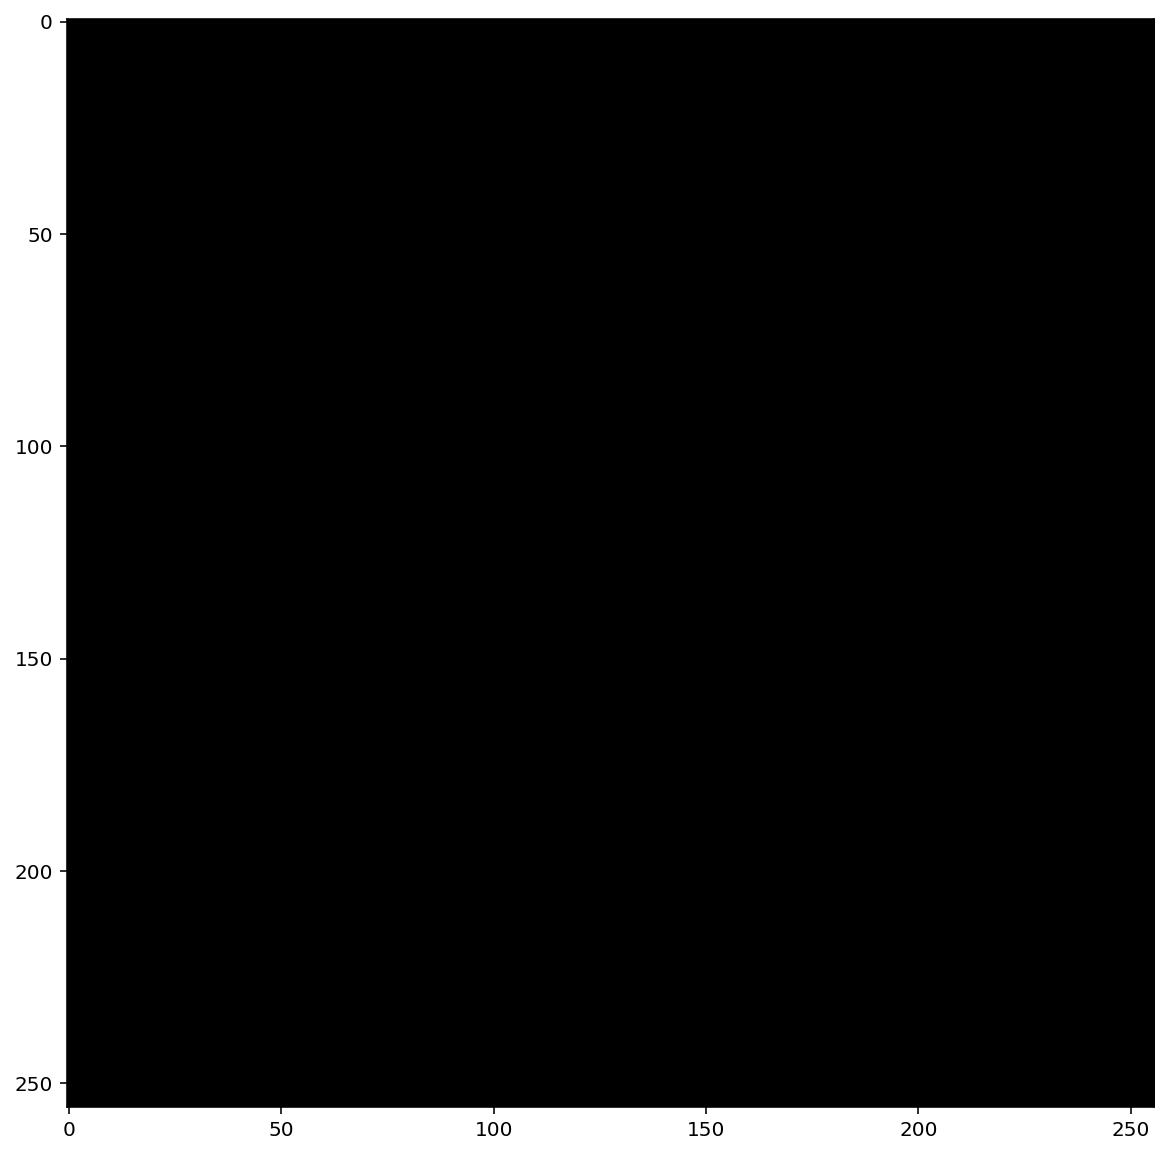

In [32]:
print(example_y[1].shape)


f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.imshow(example_y[1].argmax(axis=2).astype('uint8'),  cmap='gray');
#axes[0, 0].set_title('Tumor Example');

example_y[1].argmax(axis=1).shape
np.amax(example_y[10].argmax(axis=2))
# print(example_y[1].argmax(axis=2).dtype)

CPU times: user 628 ms, sys: 361 ms, total: 989 ms
Wall time: 4.82 s


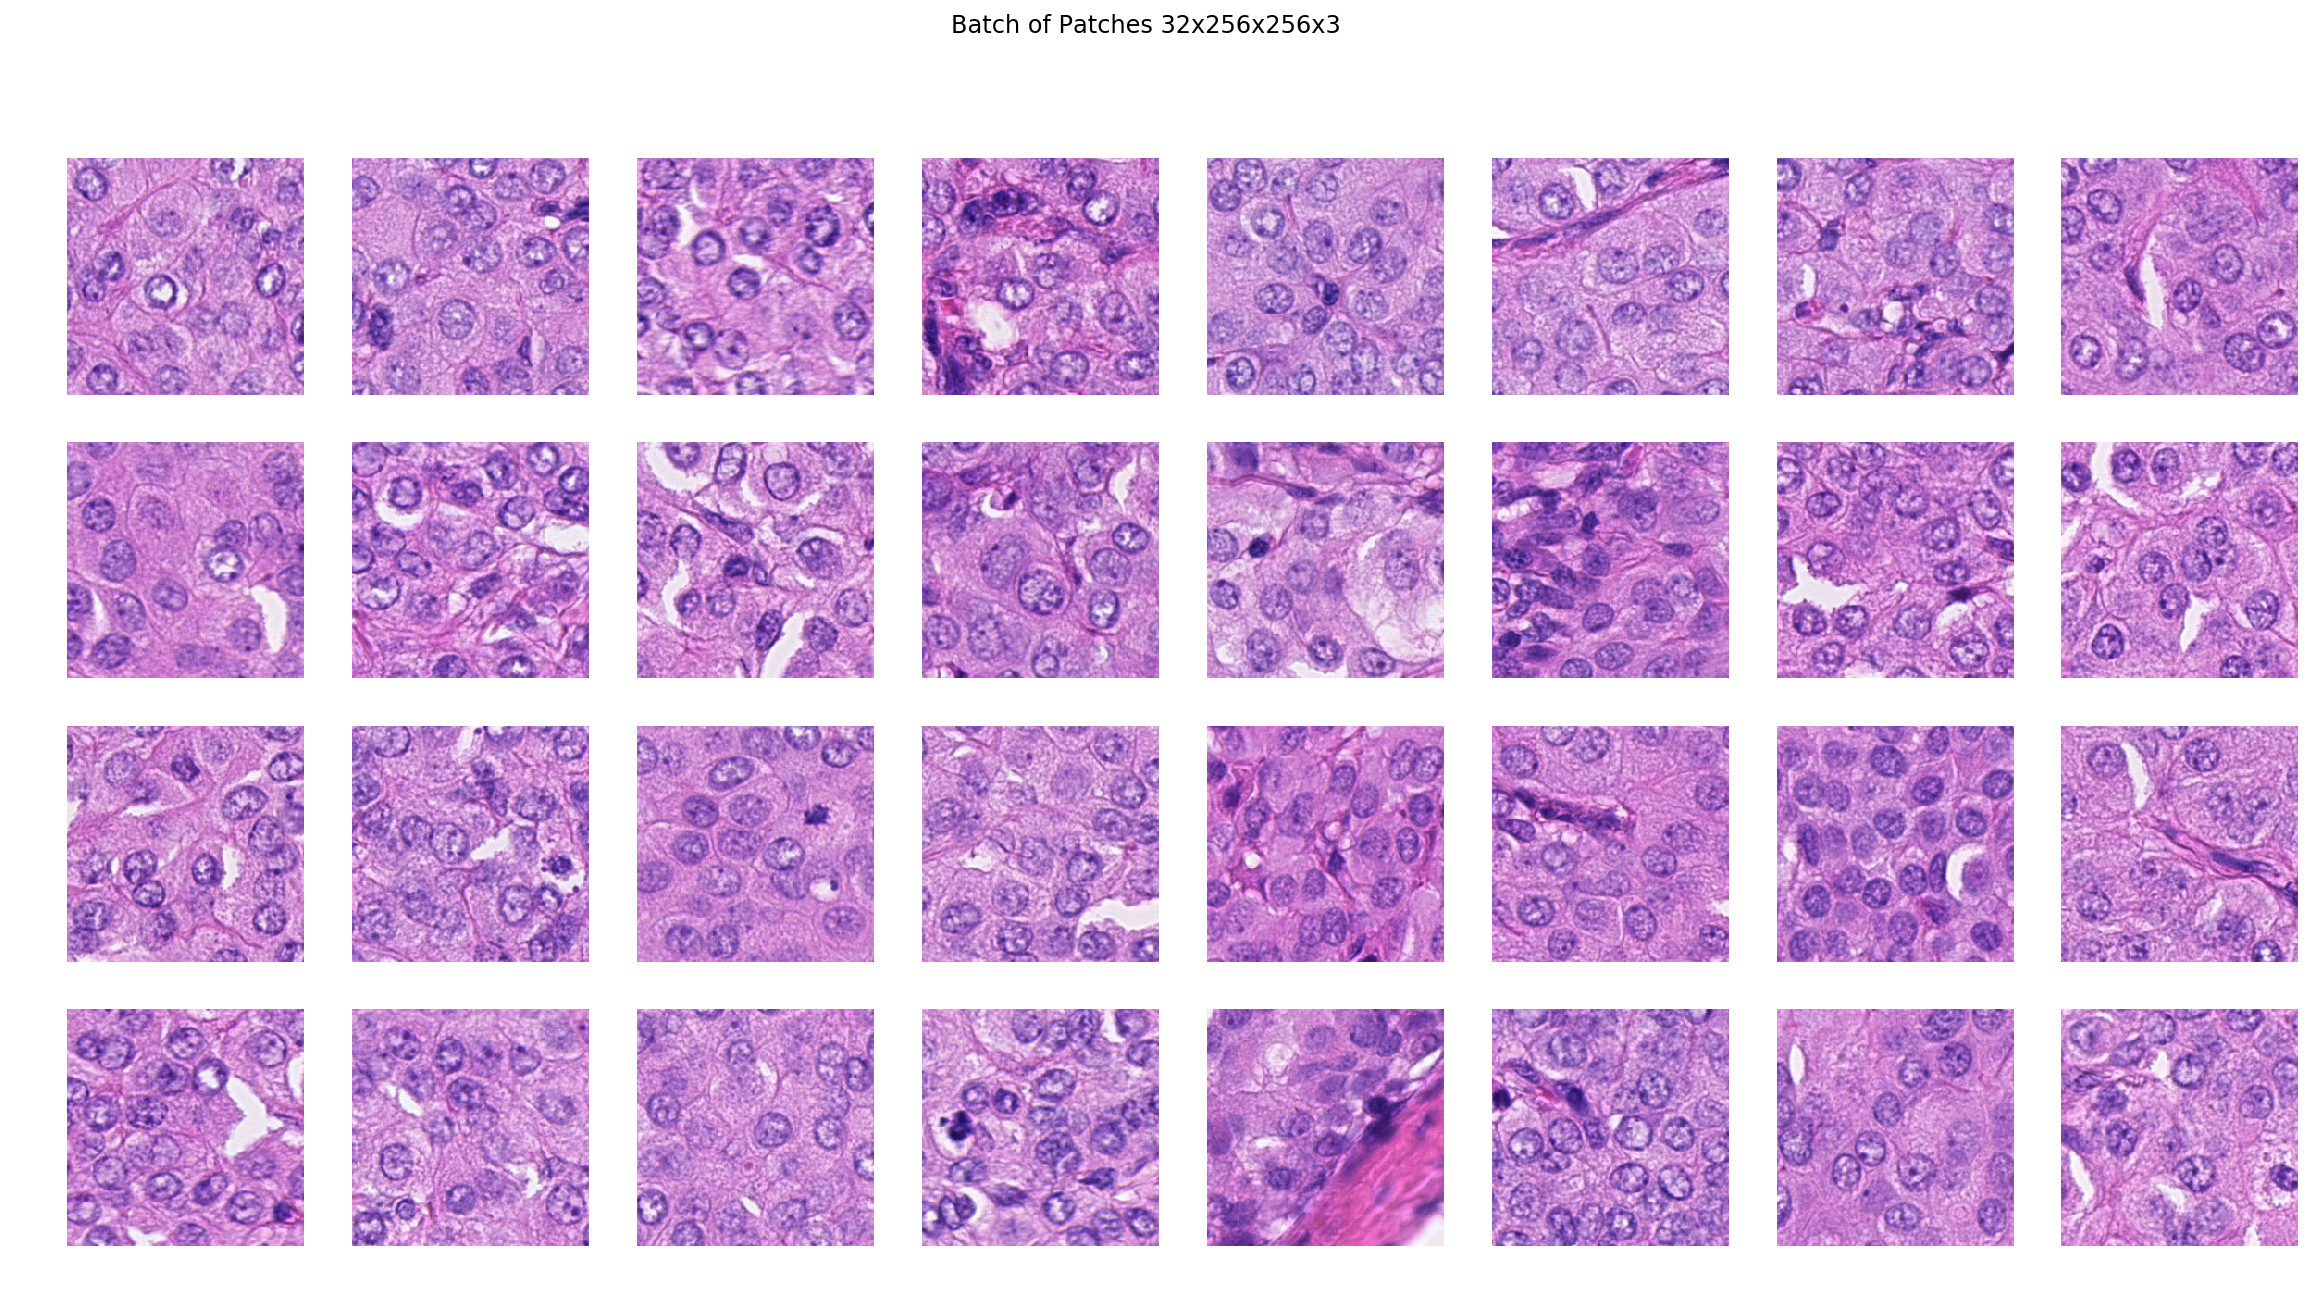

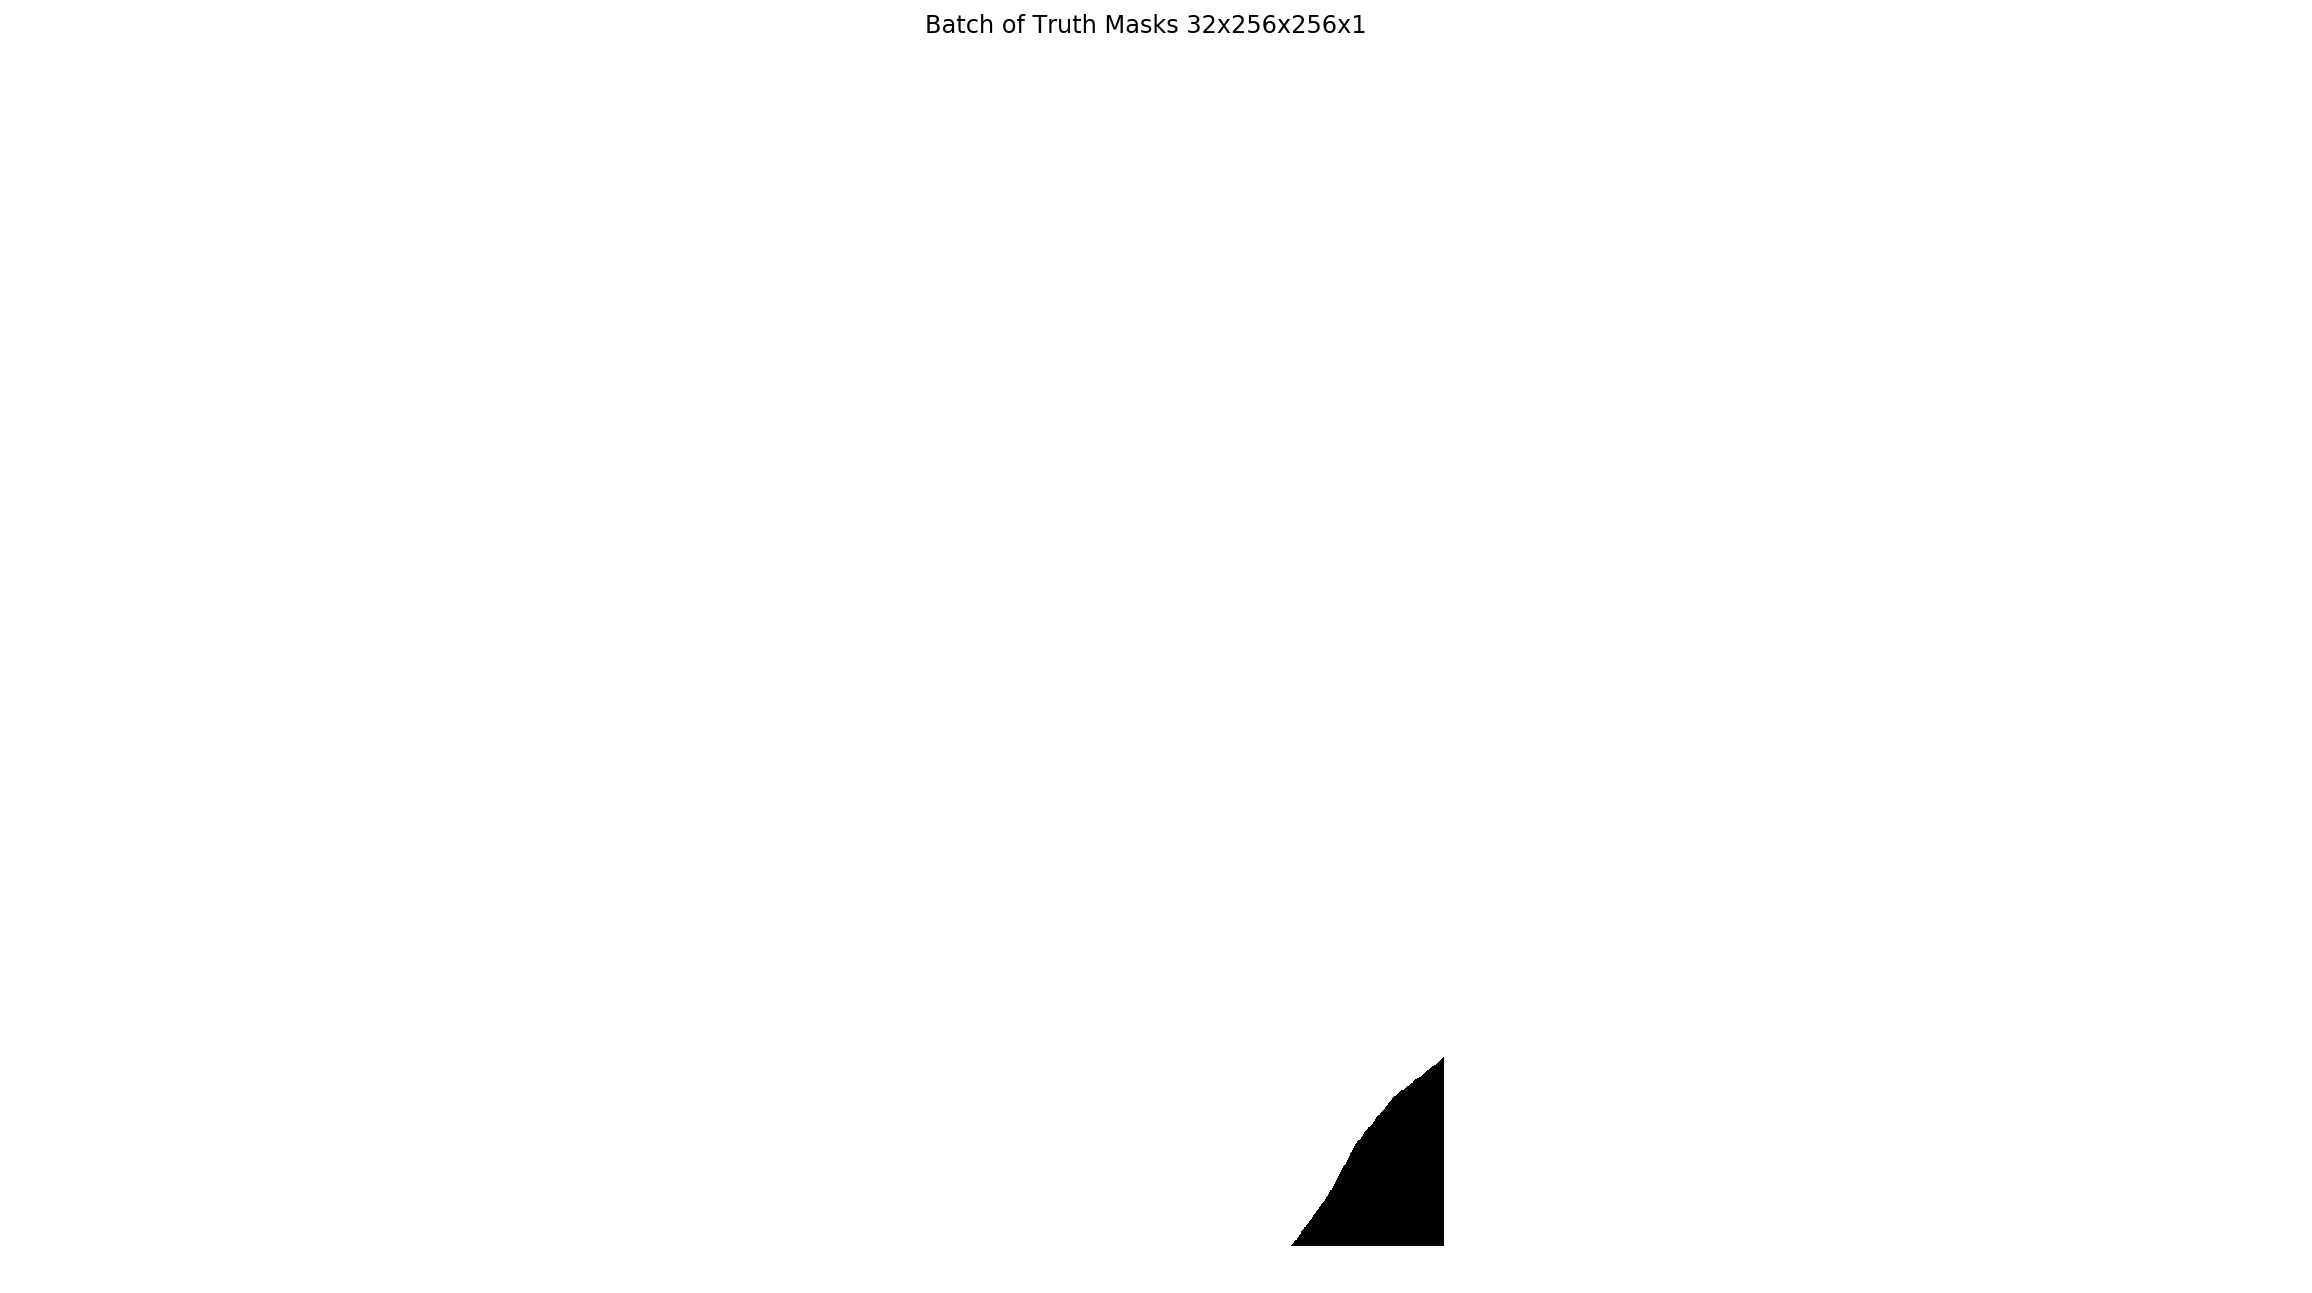

In [33]:
tumor_sample_gen = gen_imgs(tumor_samples.sample(32, random_state=20), 32, shuffle=False)
%time example_X, example_y  = next(tumor_sample_gen)



f, axes = plt.subplots(4, 8, figsize=(20, 10));
ax = axes.flatten()
for i in range(0, example_X.shape[0]):
    _ = ax[i].imshow(example_X[i]);
    _ = ax[i].axis('off');
f.suptitle('Batch of Patches 32x256x256x3');
    
f, axes = plt.subplots(4, 8, figsize=(20, 10));
ax = axes.flatten()    
for i in range(0, example_X.shape[0]):
    _ = ax[i].imshow(example_y[i].argmax(axis=2),  cmap='gray', vmin=0, vmax=1);
    _ = ax[i].axis('off');
f.suptitle('Batch of Truth Masks 32x256x256x1');

In [34]:
from keras.models import Sequential
from keras.layers import Lambda, Dropout
from keras.layers.convolutional import Convolution2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(256, 256, 3)))
model.add(Convolution2D(100, (5, 5), strides=(2, 2), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Convolution2D(200, (5, 5), strides=(2, 2), activation='elu', padding='same'))
model.add(MaxPooling2D())
model.add(Convolution2D(300, (3, 3), activation='elu', padding='same'))
model.add(Convolution2D(400, (3, 3), activation='elu',  padding='same'))
model.add(Dropout(0.1))
model.add(Convolution2D(2, (1, 1))) # this is called upscore layer for some reason?
model.add(Conv2DTranspose(2, (31, 31), strides=(16, 16), activation='softmax', padding='same'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 100)     7600      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 200)       500200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 300)       540300    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 300)       810300    
__________

In [0]:
BATCH_SIZE = 32
N_EPOCHS = 2

NUM_SAMPLES = 10000



In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

# split samples into train and validation set
# use StratifiedShuffleSplit to ensure both sets have same proportions of tumor patches
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(samples, samples["is_tumor"]):
        train_samples = samples.loc[train_index]
        val_test_samples = samples.loc[test_index]

      
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split1.split(val_test_samples, val_test_samples["is_tumor"]):
        validation_samples = samples.loc[train_index]
        test_samples = samples.loc[test_index]

In [38]:
print(train_samples.size)
print(validation_samples.size)
print(test_samples.size)


64000
12000
4000


In [0]:

from datetime import datetime

## TODO Add checkpoint mechanism to save old model before generating new

train_generator = gen_imgs(train_samples, BATCH_SIZE)
validation_generator = gen_imgs(validation_samples, BATCH_SIZE)
test_generator = gen_imgs(test_samples, BATCH_SIZE)

# Train model
train_start_time = datetime.now()
history = model.fit_generator(train_generator, np.ceil(len(train_samples) / BATCH_SIZE),
    validation_data=validation_generator,
    validation_steps=np.ceil(len(validation_samples) / BATCH_SIZE),
    epochs=N_EPOCHS)

train_end_time = datetime.now()
print("Model training time: %.1f minutes" % ((train_end_time - train_start_time).seconds / 60,))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/2
500/500 [==============================] - 3481s 7s/step - loss: 0.1515 - acc: 0.9409 - val_loss: 0.1696 - val_acc: 0.9394
Epoch 2/2
316/500 [=================>............] - ETA: 29:44 - loss: 0.1005 - acc: 0.9630

In [0]:
# Save model
model.save('model.h5')

In [0]:
test_sample = gen_imgs(test_samples.sample(32, random_state=20), 32, shuffle=False)
%time example_X, example_y  = next(test_sample)



f, axes = plt.subplots(4, 8, figsize=(20, 10));
ax = axes.flatten()
for i in range(0, example_X.shape[0]):
    _ = ax[i].imshow(example_X[i]);
    _ = ax[i].axis('off');
f.suptitle('Batch of Patches 32x256x256x3');
    
f, axes = plt.subplots(4, 8, figsize=(20, 10));
ax = axes.flatten()    
for i in range(0, example_X.shape[0]):
    _ = ax[i].imshow(example_y[i].argmax(axis=2),  cmap='gray', vmin=0, vmax=1);
    _ = ax[i].axis('off');
f.suptitle('Batch of Truth Masks 32x256x256x1');

In [0]:
def predict_from_model(patch, model):
    """Predict which pixels are tumor.
    
    input: patch: 256x256x3, rgb image
    input: model: keras model
    output: prediction: 256x256x1, per-pixel tumor probability
    """
    
    prediction = model.predict(patch.reshape(1, 256, 256, 3))
    prediction = prediction[:, :, :, 1].reshape(256, 256)
    return prediction

In [0]:
import matplotlib.gridspec as gridspec

def plot_blend(patch, prediction, ax, alpha=0.75):
    """alpha blend patch and prediction.
    https://matplotlib.org/examples/pylab_examples/layer_images.html
    
    input: patch: 256x256x3, rgb image
    input: prediction: 256x256x1, per-pixel tumor probability
    input: ax: maplotlib Axes object
    input: alpha: alpha blend
    """
    
    dx, dy = 0.05, 0.05
    x = np.arange(0, patch.shape[1] - 1, dx)
    y = np.arange(0, patch.shape[0] - 1, dy)
    xmin, xmax, ymin, ymax = np.amin(x), np.amax(x), np.amin(y), np.amax(y)
    extent = xmin, xmax, ymin, ymax

    # fig = plt.figure(frameon=False, figsize=(10, 5))
    Z1 = cv2.cvtColor(patch, code=cv2.COLOR_RGB2GRAY)
    Z2 = prediction

    im1 = ax.imshow(Z1, cmap='gray', extent=extent)
    im2 = ax.imshow(Z2, cmap='jet', alpha=alpha, vmin=0.0, vmax=1.0,
                     extent=extent)
    ax.axis('off');
def plot_patch_with_pred(patch, truth, prediction, title_str='', alpha=0.6):
    """
    input: patch: 256x256x3, rgb image
    input: truth: 256x256x2, onehot output classes (not_tumor, tumor)
    input: prediction: 256x256x1, per-pixel tumor probability
    """
    gs = gridspec.GridSpec(2, 4, width_ratios=[10, 10, 19, 1])
    ax0 = plt.subplot(gs[0, 0])
    ax1 = plt.subplot(gs[0, 1])
    ax2 = plt.subplot(gs[1, 0])
    ax3 = plt.subplot(gs[1, 1])
    ax4 = plt.subplot(gs[:, 2])
    axc = plt.subplot(gs[:, 3])

    ax0.imshow(patch);
    ax0.set_title('Original')
    
    ax1.imshow(truth.argmax(axis=2), cmap='gray', vmin=0, vmax=1);
    ax1.set_title('Truth mask (white=tumor, black=not_tumor)')
    
    p = ax2.imshow(prediction, cmap='jet', vmin=0, vmax=1);
    ax2.set_title('Prediction heatmap')

    ax3.imshow((prediction > 0.5).astype(np.int), cmap='gray', vmin=0, vmax=1);
    ax3.set_title('Prediction mask (white=tumor, black=not_tumor)')
    
    plot_blend(patch, prediction, ax4, alpha)
    ax4.set_title('Original+Prediction blend')
    
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    fig.suptitle(title_str)
    fig.colorbar(p, cax=axc, orientation="vertical")
    axc.set_title('Probability pixel is tumor')














In [0]:
example_patch = example_X[-1]
example_truth = example_y[-1]

prediction = predict_from_model(example_patch, model)
plot_patch_with_pred(example_patch, example_truth, prediction, title_str='Example Tumor Patch')

In [0]:
pred_s = pd.Series(prediction.flatten())
print(pred_s.describe())
ax = pred_s.hist(bins=100);
ax.set_title('Example patch pixel predictions');
ax.set_ylabel('Count');
ax.set_xlabel('Probability pixel is tumor');

In [0]:
example_patch = example_X[-2]
example_truth = example_y[-2]

prediction = predict_from_model(example_patch, model)
plot_patch_with_pred(example_patch, example_truth, prediction, title_str='Example Tumor Patch')

In [0]:
pred_s = pd.Series(prediction.flatten())
print(pred_s.describe())
ax = pred_s.hist(bins=100);
ax.set_title('Example patch pixel predictions');
ax.set_ylabel('Count');
ax.set_xlabel('Probability pixel is tumor');

In [0]:
example_patch = example_X[7]
example_truth = example_y[7]

prediction = predict_from_model(example_patch, model)
plot_patch_with_pred(example_patch, example_truth, prediction, title_str='Example Tumor Patch')

In [0]:

pred_s = pd.Series(prediction.flatten())
print(pred_s.describe())
ax = pred_s.hist(bins=100);
ax.set_title('Example patch pixel predictions');
ax.set_ylabel('Count');
ax.set_xlabel('Probability pixel is tumor');

In [0]:
example_patch = example_X[8]
example_truth = example_y[8]

prediction = predict_from_model(example_patch, model)
plot_patch_with_pred(example_patch, example_truth, prediction, title_str='Example Tumor Patch')

In [0]:
pred_s = pd.Series(prediction.flatten())
print(pred_s.describe())
ax = pred_s.hist(bins=100);
ax.set_title('Example patch pixel predictions');
ax.set_ylabel('Count');
ax.set_xlabel('Probability pixel is tumor');

In [0]:
def get_random_patch_from_samples(samples, random_state=None):
    X_i, y_i = next(gen_imgs(samples.sample(1, random_state=random_state), 1))
    return X_i, y_i

X_i, y_i = get_random_patch_from_samples(samples)
pred_i = predict_from_model(X_i, model)
plot_patch_with_pred(X_i[0], y_i[0], pred_i, title_str='Random Patch')

In [0]:
def get_random_patch_from_samples(samples, random_state=None):
    X_i, y_i = next(gen_imgs(samples.sample(1, random_state=random_state), 1))
    return X_i, y_i

X_i, y_i = get_random_patch_from_samples(samples)
pred_i = predict_from_model(X_i, model)
plot_patch_with_pred(X_i[0], y_i[0], pred_i, title_str='Random Patch')

In [0]:
def get_random_patch_from_samples(samples, random_state=None):
    X_i, y_i = next(gen_imgs(samples.sample(1, random_state=random_state), 1))
    return X_i, y_i

X_i, y_i = get_random_patch_from_samples(samples)
pred_i = predict_from_model(X_i, model)
plot_patch_with_pred(X_i[0], y_i[0], pred_i, title_str='Random Patch')

In [0]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

def predict_batch_from_model(patches, model):
    """Predict which pixels are tumor.
    
    input: patch: `batch_size`x256x256x3, rgb image
    input: model: keras model
    output: prediction: 256x256x1, per-pixel tumor probability
    """
    predictions = model.predict(patches)
    predictions = predictions[:, :, :, 1]
    return predictions

validation_generator = gen_imgs(validation_samples, BATCH_SIZE)
validation_steps = np.ceil(len(validation_samples) / BATCH_SIZE)

confusion_mtx = np.zeros((2, 2))

for i in tqdm(range(int(validation_steps))):
    X, y  = next(validation_generator)
    preds = predict_batch_from_model(X, model)
    
    y_true = y[:, :, :, 1].ravel()
    y_pred = np.uint8(preds > 0.5).ravel()
    
    confusion_mtx += confusion_matrix(y_true, y_pred, labels=[0, 1])

In [0]:
confusion_mtx


In [0]:
tn = confusion_mtx[0, 0]
fp = confusion_mtx[0, 1]
fn = confusion_mtx[1, 0]
tp = confusion_mtx[1, 1]

In [0]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))

print("Accuracy: %.2f" % accuracy)
print("Recall: %.2f" % recall)
print("Precision: %.2f" % precision)
print("F1 Score: %.2f" % f1_score)

In [0]:
all_samples=samples
#3all_samples = find_patches_from_slide(slide_path1, filter_non_tissue=False)
#print('Total patches in slide: %d' % len(all_samples))
all_samples.iloc[:5]
all_samples.is_tumor.value_counts()

In [0]:
from matplotlib import cm
from tqdm import tqdm

output_dir = Path('/content/drive/My Drive/appdl_final/dataset/dataset')

alpha = 0.5

n_samples = len(all_samples)
n_cols = int(slide2.dimensions[0] / 256)
n_rows = int(slide2.dimensions[1] / 256)
#assert n_cols * n_rows == n_samples

thumbnail = slide2.get_thumbnail((n_cols, n_rows))
thumbnail = np.array(thumbnail)

# batch_size = n_cols
batch_size = 32
output_thumbnail_preds = list()
    
for offset in tqdm(list(range(0, n_samples, batch_size))):
    batch_samples = all_samples.iloc[offset:offset+batch_size]
    png_fnames = batch_samples.tile_loc.apply(lambda coord: str(output_dir / ('%d_%d.png' % coord[::-1])))
    
    X, _ = next(gen_imgs(batch_samples, batch_size, shuffle=False))
    
    if batch_samples.is_tissue.nunique() == 1 and batch_samples.iloc[0].is_tissue == False:
        # all patches in this row do not have tissue, skip them all
        output_thumbnail_preds.append(np.zeros(batch_size, dtype=np.float32))
        
        # output pngs
        for i, png_fname in enumerate(png_fnames):
            plt.imsave(png_fname, X[i])
    else:
        # make predictions
        preds = predict_batch_from_model(X, model)
        output_thumbnail_preds.append(preds.mean(axis=(1,2)))

        # overlay preds
        # save blended imgs
        for i, png_fname in enumerate(png_fnames):
            pred_i = preds[i]
            X_i = X[i]
            output_img = cv2.cvtColor(X_i, cv2.COLOR_RGB2GRAY)
            output_img2 = cv2.cvtColor(output_img.copy(), cv2.COLOR_GRAY2RGB)

            overlay = np.uint8(cm.jet(pred_i) * 255)[:,:,:3]
            blended = cv2.addWeighted(overlay, alpha, output_img2, 1-alpha, 0, output_img)
            
            plt.imsave(png_fname, blended)
        

output_thumbnail_preds = np.array(output_thumbnail_preds)

In [0]:
!cd sample_data; ls

In [0]:
output_thumbnail_preds = output_thumbnail_preds.reshape(n_rows, n_cols)
truth = openslide.open_slide(tumor_mask_path)

In [0]:
f, axes = plt.subplots(1, 2, figsize=(40, 18))
ax = axes.flatten()
plot_blend(thumbnail, output_thumbnail_preds, ax=ax[0])

thumbnail_truth = truth.get_thumbnail((truth.dimensions[0] / 256, truth.dimensions[1] / 256)) 
ax[1].imshow(thumbnail_truth.convert('L'), cmap='gray');
ax[0].set_title('Original+Predictions blend')
ax[1].set_title('Truth')
ax[1].axis('off');
plt.tight_layout();